# **Previs√£o de Pre√ßo de Im√≥veis em Tokyo**

## **Parte 1 - Problema de Neg√≥cio**

**Contexto**

O mercado imobili√°rio de Tokyo √© um dos mais competitivos e din√¢micos do mundo.
Comprar ou vender im√≥veis envolve altos valores e decis√µes r√°pidas, e pequenas diferen√ßas no pre√ßo de avalia√ß√£o podem significar grandes perdas ou ganhos para incorporadoras, investidores, compradores finais e corretores.

**Desafio da Empresa**

A palpe.co, uma empresa japonesa de tecnologia e dados para o mercado imobili√°rio, deseja automatizar e aprimorar a previs√£o de valores de mercado dos im√≥veis negociados em Tokyo. Eles possuem um extenso hist√≥rico de transa√ß√µes imobili√°rias (2005‚Äì2019), com dezenas de vari√°veis estruturais, geogr√°ficas e temporais para cada im√≥vel.

**Desafio**

Como a palpe.co pode construir um modelo preditivo robusto, preciso e escal√°vel que estime, com alta acur√°cia, o valor de mercado TradePrice de im√≥veis residenciais e comerciais em Tokyo, a partir de dados estruturais (√°rea, ano, uso, proximidade de esta√ß√µes, etc.), e assim:

* Aumentar a efici√™ncia de avalia√ß√£o dos im√≥veis
* Otimizar decis√µes de compra/venda
* Reduzir riscos de sub ou superavalia√ß√£o
* Melhorar negocia√ß√µes e propostas para clientes finais e investidores.

**Objetivo Anal√≠tico**

Desenvolver um pipeline completo de ci√™ncia de dados capaz de:

Limpar, organizar e transformar a base de transa√ß√µes hist√≥ricas.

Explorar e visualizar padr√µes de pre√ßo por bairro, √°rea, idade do im√≥vel e proximidade de transporte p√∫blico.

Treinar e validar modelos supervisionados para prever o pre√ßo de vendaTradePrice usando as vari√°veis dispon√≠veis.

Medir desempenho do modelo em m√©tricas adequadas ao neg√≥cio (RMSLE, MAPE).

Gerar explica√ß√µes e visualiza√ß√µes para apoiar analistas, corretores e tomadores de decis√£o.

**Benef√≠cios esperados**

Avalia√ß√£o automatizada e √°gil de novos im√≥veis anunciados

Transpar√™ncia para clientes finais e corretores

Suporte √† precifica√ß√£o justa e competitiva

Melhor embasamento para investimento, financiamento e portf√≥lio de ativos

**Objetivo final**

**"Como prever com precis√£o o pre√ßo de venda de um im√≥vel em Tokyo, usando dados hist√≥ricos e caracter√≠sticas do im√≥vel, para otimizar decis√µes de neg√≥cios do setor imobili√°rio?"**

# Parte 2 - Base dados

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from sqlalchemy import create_engine

In [2]:
# Conex√£o com SQLite 
engine = create_engine(r"sqlite:///C:/Users/rafae.RAFAEL_NOTEBOOK/Downloads/case_tecnico_paipe/db/tokyo.sqlite")

# 1Ô∏èGarante que a pasta existe (pode rodar v√°rias vezes, n√£o d√° erro)
os.makedirs(r"C:\Users\rafae.RAFAEL_NOTEBOOK\Downloads\case_tecnico_paipe\db", exist_ok=True)

In [3]:
# L√™ as views de treino e teste
train = pd.read_sql("SELECT * FROM vw_train", engine)
test = pd.read_sql("SELECT * FROM vw_test", engine)

# Ver todas as colunas mesmo que o pandas
pd.set_option('display.max_columns', None)

In [4]:
# Visualizando base dados
train.head()

Type            Region  MunicipalityCode  \
0         Pre-owned Condominiums, etc.              None             13103   
1  Residential Land(Land and Building)  Residential Area             13120   
2          Residential Land(Land Only)  Residential Area             13201   
3         Pre-owned Condominiums, etc.              None             13208   
4          Residential Land(Land Only)  Residential Area             13117   

  Prefecture   Municipality      DistrictName NearestStation  \
0      Tokyo    Minato Ward            Kaigan      Takeshiba   
1      Tokyo    Nerima Ward           Nishiki   Kamiitabashi   
2      Tokyo  Hachioji City  Shimoongatamachi  Takao (Tokyo)   
3      Tokyo     Chofu City      Kamiishiwara     Nishichofu   
4      Tokyo      Kita Ward             Shimo          Shimo   

  TimeToNearestStation  MinTimeToNearestStation  MaxTimeToNearestStation  \
0                    1                      1.0                      1.0   
1                   15                     15.0                     15.0   
2              1H-1H30                     60.0                     90.0   
3                   16                     16.0                     16.0   
4                    6                      6.0                      6.0   

  FloorPlan  Area  AreaIsGreaterFlag  UnitPrice  PricePerTsubo  \
0        1K    35                  0        NaN            NaN   
1      None   110                  0        NaN            NaN   
2      None   135                  0   100000.0       340000.0   
3      3LDK    60                  0        NaN            NaN   
4      None    60                  0   550000.0      1800000.0   

                 LandShape  Frontage  FrontageIsGreaterFlag  TotalFloorArea  \
0                     None       NaN                      0             NaN   
1  Semi-rectangular Shaped      12.0                      0           105.0   
2         Irregular Shaped      10.0                      0             NaN   
3                     None       NaN                      0             NaN   
4       Trapezoidal Shaped       8.0                      0             NaN   

   TotalFloorAreaIsGreaterFlag  BuildingYear  PrewarBuilding Structure    Use  \
0                            0        1979.0               0       SRC  House   
1                            0        2013.0               0         W  House   
2                            0           NaN               0      None   None   
3                            0        1999.0               0        RC  House   
4                            0           NaN               0      None   None   

  Purpose  Direction Classification  Breadth  \
0    None       None           None      NaN   
1    None       East   Private Road      4.0   
2    None       East   Private Road      4.5   
3   Other       None           None      NaN   
4   House  Southwest      Ward Road      4.5   

                                        CityPlanning  CoverageRatio  \
0                              Quasi-industrial Zone           60.0   
1  Category I Exclusively Low-story Residential Zone           60.0   
2  Category I Exclusively Low-story Residential Zone           40.0   
3                              Quasi-industrial Zone           60.0   
4  Category I Exclusively Medium-high Residential...           60.0   

   FloorAreaRatio            Period  Year  Quarter Renovation  \
0           400.0  1st quarter 2011  2011        1       Done   
1           200.0  3rd quarter 2013  2013        3       None   
2            80.0  4th quarter 2007  2007        4       None   
3           200.0  2nd quarter 2015  2015        2    Not yet   
4           200.0  4th quarter 2015  2015        4       None   

                           Remarks  TradePrice  
0                             None    24000000  
1  Dealings including private road    51000000  
2                             None    14000000  
3                             None    23000000  
4           

In [5]:
# Visualizando 5 √∫ltimos dados
train.tail()

Type Region  MunicipalityCode Prefecture  \
325255  Pre-owned Condominiums, etc.   None             13201      Tokyo   
325256  Pre-owned Condominiums, etc.   None             13113      Tokyo   
325257  Pre-owned Condominiums, etc.   None             13119      Tokyo   
325258  Pre-owned Condominiums, etc.   None             13120      Tokyo   
325259  Pre-owned Condominiums, etc.   None             13219      Tokyo   

         Municipality    DistrictName NearestStation TimeToNearestStation  \
325255  Hachioji City       Myojincho   Keiohachioji                    7   
325256   Shibuya Ward  Daikan-yamacho    Daikan-yama                    4   
325257  Itabashi Ward       Futabacho   Nakaitabashi                    5   
325258    Nerima Ward      Asahigaoka      Shinegota                    6   
325259     Komae City    Higashiizumi          Komae                    4   

        MinTimeToNearestStation  MaxTimeToNearestStation FloorPlan  Area  \
325255                      7.0                      7.0        1K    15   
325256                      4.0                      4.0      2LDK    85   
325257                      5.0                      5.0        1K    25   
325258                      6.0                      6.0        1K    20   
325259                      4.0                      4.0      2LDK    80   

        AreaIsGreaterFlag  UnitPrice  PricePerTsubo LandShape  Frontage  \
325255                  0        NaN            NaN      None       NaN   
325256                  0        NaN            NaN      None       NaN   
325257                  0        NaN            NaN      None       NaN   
325258                  0        NaN            NaN      None       NaN   
325259                  0        NaN            NaN      None       NaN   

        FrontageIsGreaterFlag  TotalFloorArea  TotalFloorAreaIsGreaterFlag  \
325255                      0             NaN                            0   
325256                      0             NaN                            0   
325257                      0             NaN                            0   
325258                      0             NaN                            0   
325259                      0             NaN                            0   

        BuildingYear  PrewarBuilding Structure    Use Purpose Direction  \
325255           NaN               0       SRC  House    None      None   
325256        2000.0               0       SRC  House   House      None   
325257        2011.0               0        RC  House    None      None   
325258        2006.0               0        RC  House    None      None   
325259        1999.0               0        RC  House    None      None   

       Classification  Breadth  \
325255           None      NaN   
325256           None      NaN   
325257           None      NaN   
325258           None      NaN   
325259           None      NaN   

                                             CityPlanning  CoverageRatio  \
325255                       Neighborhood Commercial Zone           80.0   
325256                       Category II Residential Zone           60.0   
325257                       Neighborhood Commercial Zone           80.0   
325258  Category I Exclusively Medium-high Residential...           60.0   
325259  Category I Exclusively Medium-high Residential...           60.0   

        FloorAreaRatio            Period  Year  Quarter Renovation Remarks  \
325255           300.0  2nd quarter 2008  2008        2    Not yet    None   
325256           300.0  2nd quarter 2015  2015        2    Not yet    None   
325257           300.0  1st quarter 2013  2013        1    Not yet    None   
325258           200.0  3rd quarter 2016  2016        3    Not yet    None   
325259           200.0  2nd quarter 2011  2011        2    Not yet    None   

        TradePrice  
325255     4500000  
325256   130000000  
325257    19000000  
325258    14000000  
325259    43000000

In [6]:
# Visualizando linhas e colunas
print("Visualizando linhas e colunas Train:", train.shape)

Visualizando linhas e colunas Train: (325260, 37)


In [7]:
# Visualziando info dados
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325260 entries, 0 to 325259
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Type                         325260 non-null  object 
 1   Region                       177206 non-null  object 
 2   MunicipalityCode             325260 non-null  int64  
 3   Prefecture                   325260 non-null  object 
 4   Municipality                 325260 non-null  object 
 5   DistrictName                 325053 non-null  object 
 6   NearestStation               323913 non-null  object 
 7   TimeToNearestStation         317002 non-null  object 
 8   MinTimeToNearestStation      317002 non-null  float64
 9   MaxTimeToNearestStation      316879 non-null  float64
 10  FloorPlan                    142674 non-null  object 
 11  Area                         325260 non-null  int64  
 12  AreaIsGreaterFlag            325260 non-null  int64  
 13 

In [8]:
# Visualizando os tipos dados
train.dtypes

Type                            object
Region                          object
MunicipalityCode                 int64
Prefecture                      object
Municipality                    object
DistrictName                    object
NearestStation                  object
TimeToNearestStation            object
MinTimeToNearestStation        float64
MaxTimeToNearestStation        float64
FloorPlan                       object
Area                             int64
AreaIsGreaterFlag                int64
UnitPrice                      float64
PricePerTsubo                  float64
LandShape                       object
Frontage                       float64
FrontageIsGreaterFlag            int64
TotalFloorArea                 float64
TotalFloorAreaIsGreaterFlag      int64
BuildingYear                   float64
PrewarBuilding                   int64
Structure                       object
Use                             object
Purpose                         object
Direction                

# **Parte 3 - Pr√©-processamento**

Esta se√ß√£o executa o pr√©-processamento dos dados para preparar o dataset para a modelagem. S√£o aplicadas t√©cnicas como tratamento de dados ausentes,
corre√ß√£o de tipos, encoding de vari√°veis categ√≥ricas e cria√ß√£o de features.

In [9]:
# C√≥pia de seguran√ßa para n√£o modificar o original
df_eda = train.copy()

In [10]:
# Corrige tipos das vari√°veis num√©ricas e datas (se necess√°rio)
# Define lista de colunas num√©ricas que devem ser convertidas explicitamente
colunas_num = [
    'Area', 'TotalFloorArea', 'Frontage', 'Breadth', 'CoverageRatio',
    'FloorAreaRatio', 'BuildingYear', 'UnitPrice', 'PricePerTsubo',
    'MinTimeToNearestStation', 'MaxTimeToNearestStation', 'TradePrice'
]

# Converte cada coluna para tipo num√©rico, for√ßando coer√ß√£o de erros (valores inv√°lidos viram NaN)
for col in colunas_num:
    if col in df_eda.columns:
        df_eda[col] = pd.to_numeric(df_eda[col], errors='coerce')

# Calcula a propor√ß√£o de valores ausentes em cada coluna
nulos = df_eda.isnull().mean().sort_values(ascending=False)

# Exibe colunas com valores faltantes para posterior an√°lise (sem imputar nesta etapa)
print("Percentual de valores nulos por coluna:\n", nulos[nulos > 0])


Percentual de valores nulos por coluna:
 Remarks                    0.921912
UnitPrice                  0.804510
PricePerTsubo              0.804510
TotalFloorArea             0.664868
Purpose                    0.612000
Renovation                 0.589808
FloorPlan                  0.561354
Frontage                   0.501491
Breadth                    0.465148
Classification             0.462246
Direction                  0.456210
LandShape                  0.456164
Region                     0.455187
Use                        0.240494
BuildingYear               0.226736
Structure                  0.216780
MaxTimeToNearestStation    0.025767
MinTimeToNearestStation    0.025389
TimeToNearestStation       0.025389
FloorAreaRatio             0.014305
CoverageRatio              0.014305
CityPlanning               0.009285
NearestStation             0.004141
DistrictName               0.000636
dtype: float64


In [11]:
# Preenche categorias com "Unknown" onde h√° muitos nulos (opcional para gr√°ficos)
# Este procedimento evita que categorias ausentes prejudiquem a visualiza√ß√£o ou agrupamentos na EDA
colunas_cat = [
    'Type', 'Region', 'Prefecture', 'Municipality', 'Structure',
    'LandShape', 'Direction', 'Use', 'Purpose', 'Renovation',
    'Classification', 'FloorPlan'
]

# Substitui valores nulos por "Unknown" nas vari√°veis categ√≥ricas
for col in colunas_cat:
    if col in df_eda.columns:
        df_eda[col] = df_eda[col].fillna("Unknown")

# Remove colunas irrelevantes ou totalmente vazias
# A coluna "Remarks" geralmente cont√©m texto livre e n√£o √© √∫til para an√°lise explorat√≥ria inicial
colunas_para_drop = ['Remarks']
df_eda = df_eda.drop(columns=[col for col in colunas_para_drop if col in df_eda.columns])

# Exibe o DataFrame atualizado ap√≥s o pr√©-processamento inicial
df_eda


Type            Region  \
0              Pre-owned Condominiums, etc.           Unknown   
1       Residential Land(Land and Building)  Residential Area   
2               Residential Land(Land Only)  Residential Area   
3              Pre-owned Condominiums, etc.           Unknown   
4               Residential Land(Land Only)  Residential Area   
...                                     ...               ...   
325255         Pre-owned Condominiums, etc.           Unknown   
325256         Pre-owned Condominiums, etc.           Unknown   
325257         Pre-owned Condominiums, etc.           Unknown   
325258         Pre-owned Condominiums, etc.           Unknown   
325259         Pre-owned Condominiums, etc.           Unknown   

        MunicipalityCode Prefecture   Municipality      DistrictName  \
0                  13103      Tokyo    Minato Ward            Kaigan   
1                  13120      Tokyo    Nerima Ward           Nishiki   
2                  13201      Tokyo  Hachioji City  Shimoongatamachi   
3                  13208      Tokyo     Chofu City      Kamiishiwara   
4                  13117      Tokyo      Kita Ward             Shimo   
...                  ...        ...            ...               ...   
325255             13201      Tokyo  Hachioji City         Myojincho   
325256             13113      Tokyo   Shibuya Ward    Daikan-yamacho   
325257             13119      Tokyo  Itabashi Ward         Futabacho   
325258             13120      Tokyo    Nerima Ward        Asahigaoka   
325259             13219      Tokyo     Komae City      Higashiizumi   

       NearestStation TimeToNearestStation  MinTimeToNearestStation  \
0           Takeshiba                    1                      1.0   
1        Kamiitabashi                   15                     15.0   
2       Takao (Tokyo)              1H-1H30                     60.0   
3          Nishichofu                   16                     16.0   
4               Shimo                    6                      6.0   
...               ...                  ...                      ...   
325255   Keiohachioji                    7                      7.0   
325256    Daikan-yama                    4                      4.0   
325257   Nakaitabashi                    5                      5.0   
325258      Shinegota                    6                      6.0   
325259          Komae                    4                      4.0   

        MaxTimeToNearestStation FloorPlan  Area  AreaIsGreaterFlag  UnitPrice  \
0                           1.0        1K    35                  0        NaN   
1                          15.0   Unknown   110                  0        NaN   
2                          90.0   Unknown   135                  0   100000.0   
3                          16.0      3LDK    60                  0        NaN   
4                           6.0   Unknown    60                  0   550000.0   
...                         ...       ...   ...                ...        ...   
325255                      7.0        1K    15                  0        NaN   
325256                      4.0      2LDK    85                  0        NaN   
325257                      5.0        1K    25                  0        NaN   
325258                      6.0        1K    20                  0        NaN   
325259                      4.0      2LDK    80                  0        NaN   

        PricePerTsubo                LandShape  Frontage  \
0                 NaN                  Unknown       NaN   
1                 NaN  Semi-rectangular Shaped      12.0   
2            340000.0         Irregular Shaped      10.0   
3                 NaN                  Unknown       NaN   
4           1800000.0       Trapezoidal Shaped       8.0   
...               ...                      ...       ...   
325255            NaN                  Unknown       NaN   
325256            NaN                  Unknown       NaN   
325257            NaN      

# **Parte 4 - Limpeza de dados**

- Este bloco executa a limpeza de dados Corrige tipos de vari√°veis e trata valores ausentes e remove duplicatas. Corrige outliers simples e remove colunas irrelevantes para EAD.

In [12]:
# Mostra a quantidade absoluta de valores nulos por coluna
print("Valores nulos por coluna:")
print(df_eda.isnull().sum())

Valores nulos por coluna:
Type                                0
Region                              0
MunicipalityCode                    0
Prefecture                          0
Municipality                        0
DistrictName                      207
NearestStation                   1347
TimeToNearestStation             8258
MinTimeToNearestStation          8258
MaxTimeToNearestStation          8381
FloorPlan                           0
Area                                0
AreaIsGreaterFlag                   0
UnitPrice                      261675
PricePerTsubo                  261675
LandShape                           0
Frontage                       163115
FrontageIsGreaterFlag               0
TotalFloorArea                 216255
TotalFloorAreaIsGreaterFlag         0
BuildingYear                    73748
PrewarBuilding                      0
Structure                           0
Use                                 0
Purpose                             0
Direction               

In [13]:
# Mostra a porcentagem (%) de valores nulos por coluna (ordem decrescente)
print("\nPercentual de valores nulos por coluna:")
print((df_eda.isnull().mean() * 100).sort_values(ascending=False))


Percentual de valores nulos por coluna:
PricePerTsubo                  80.451024
UnitPrice                      80.451024
TotalFloorArea                 66.486811
Frontage                       50.149111
Breadth                        46.514788
BuildingYear                   22.673553
MaxTimeToNearestStation         2.576708
TimeToNearestStation            2.538892
MinTimeToNearestStation         2.538892
CoverageRatio                   1.430548
FloorAreaRatio                  1.430548
CityPlanning                    0.928488
NearestStation                  0.414130
DistrictName                    0.063641
Use                             0.000000
Period                          0.000000
Year                            0.000000
Quarter                         0.000000
Classification                  0.000000
Direction                       0.000000
Renovation                      0.000000
Purpose                         0.000000
Type                            0.000000
Structure       

In [14]:
# Mostra apenas colunas que possuem valores nulos
nulos = df_eda.isnull().sum()
print("\nColunas com pelo menos 1 valor nulo:")
print(nulos[nulos > 0])


Colunas com pelo menos 1 valor nulo:
DistrictName                  207
NearestStation               1347
TimeToNearestStation         8258
MinTimeToNearestStation      8258
MaxTimeToNearestStation      8381
UnitPrice                  261675
PricePerTsubo              261675
Frontage                   163115
TotalFloorArea             216255
BuildingYear                73748
Breadth                    151294
CityPlanning                 3020
CoverageRatio                4653
FloorAreaRatio               4653
dtype: int64


In [15]:
# Limpeza de Dados ‚Äî Preenchendo Nulos no df_eda

# Preenche colunas num√©ricas e categ√≥ricas mais relevantes com zero.
# Esse procedimento evita erros em opera√ß√µes matem√°ticas e visualiza√ß√µes posteriores.
cols_para_zero = [
    'PricePerTsubo', 'UnitPrice', 'TotalFloorArea', 'Frontage', 'Breadth',
    'BuildingYear', 'MaxTimeToNearestStation', 'TimeToNearestStation', 'AgeAtSale',
    'MinTimeToNearestStation', 'CoverageRatio', 'FloorAreaRatio',
    'CityPlanning', 'NearestStation', 'DistrictName'
]

for col in cols_para_zero:
    if col in df_eda.columns:
        df_eda[col] = df_eda[col].fillna(0)

# Para colunas categ√≥ricas, substitui valores nulos por "Unknown"
# Essa abordagem facilita a an√°lise descritiva e evita que gr√°ficos apresentem categorias vazias.
categoricas = df_eda.select_dtypes(include=['object']).columns.tolist()
for col in categoricas:
    df_eda[col] = df_eda[col].fillna('Unknown')

# Verifica se ainda existem valores nulos no DataFrame ap√≥s o tratamento
n_nulos_eda = df_eda.isnull().sum().sum()

print(f"N√∫mero total de valores nulos no df_eda: {n_nulos_eda}")

# Exibe colunas que ainda apresentam valores ausentes, se houver
if n_nulos_eda > 0:
    print("Colunas com nulos em df_eda:\n", df_eda.isnull().sum()[df_eda.isnull().sum() > 0])
else:
    print("Nenhum valor nulo restante no df_eda.")

N√∫mero total de valores nulos no df_eda: 0
Nenhum valor nulo restante no df_eda.


In [16]:
# Verifica√ß√£o de duplicatas

# Calcula a quantidade total de linhas duplicadas no DataFrame
n_duplicados = df_eda.duplicated().sum()

# Exibe o n√∫mero de registros duplicados encontrados
print(f"N√∫mero de linhas duplicadas: {n_duplicados}")

N√∫mero de linhas duplicadas: 2467


In [17]:
# Exibe exemplos de duplicatas (se existirem)
if n_duplicados > 0:
    print("Exemplos de linhas duplicadas:")
    display(df_eda[df_eda.duplicated()].head())
else:
    print("N√£o h√° linhas duplicadas no DataFrame.")

Exemplos de linhas duplicadas:


Type   Region  MunicipalityCode Prefecture  \
5388   Pre-owned Condominiums, etc.  Unknown             13102      Tokyo   
5428   Pre-owned Condominiums, etc.  Unknown             13109      Tokyo   
8149   Pre-owned Condominiums, etc.  Unknown             13116      Tokyo   
12898  Pre-owned Condominiums, etc.  Unknown             13120      Tokyo   
13123  Pre-owned Condominiums, etc.  Unknown             13104      Tokyo   

         Municipality    DistrictName       NearestStation  \
5388        Chuo Ward        Shintomi  Shintomicho (Tokyo)   
5428   Shinagawa Ward  Higashigotanda              Gotanda   
8149     Toshima Ward  Nishiikebukuro            Kanamecho   
12898     Nerima Ward  Nakamuraminami         Toritsukasei   
13123   Shinjuku Ward        Samoncho      Yotsuya 3-chome   

      TimeToNearestStation  MinTimeToNearestStation  MaxTimeToNearestStation  \
5388                     2                      2.0                      2.0   
5428                     7                      7.0                      7.0   
8149                     2                      2.0                      2.0   
12898                   13                     13.0                     13.0   
13123                    3                      3.0                      3.0   

      FloorPlan  Area  AreaIsGreaterFlag  UnitPrice  PricePerTsubo LandShape  \
5388         1K    25                  0        0.0            0.0   Unknown   
5428         1K    20                  0        0.0            0.0   Unknown   
8149         1K    20                  0        0.0            0.0   Unknown   
12898        1K    20                  0        0.0            0.0   Unknown   
13123        1K    25                  0        0.0            0.0   Unknown   

       Frontage  FrontageIsGreaterFlag  TotalFloorArea  \
5388        0.0                      0             0.0   
5428        0.0                      0             0.0   
8149        0.0                      0             0.0   
12898       0.0                      0             0.0   
13123       0.0                      0             0.0   

       TotalFloorAreaIsGreaterFlag  BuildingYear  PrewarBuilding Structure  \
5388                             0        2016.0               0        RC   
5428                             0        2014.0               0        RC   
8149                             0        2007.0               0        RC   
12898                            0        2007.0               0        RC   
13123                            0        2002.0               0       SRC   

         Use  Purpose Direction Classification  Breadth  \
5388   House    House   Unknown        Unknown      0.0   
5428   House    House   Unknown        Unknown      0.0   
8149   House  Unknown   Unknown        Unknown      0.0   
12898  House  Unknown   Unknown        Unknown      0.0   
13123  House  Unknown   Unknown        Unknown      0.0   

                       CityPlanning  CoverageRatio  FloorAreaRatio  \
5388                Commercial Zone           80.0           700.0   
5428   Category II Residential Zone           60.0           400.0   
8149                Commercial Zone           80.0           500.0   
12898   Category I Residential Zone           60.0           200.0   
13123               Commercial Zone           80.0           500.0   

                 Period  Year  Quarter Renovation  TradePrice  
5388   3rd quarter 2016  2016        3    Unknown    37000000  
5428   3rd quarter 2014  2014        3    Not yet    24000000  
8149   3rd quarter 2007  2007        3    Not yet    25000000  
12898  3rd quarter 2007  2007        3    Not yet    19000000  
13123  3rd quarter 2013  2013        3       Done    27000000

Area: 28372 outliers encontrados.
Limite inferior: -47.50, Limite superior: 212.50
Alguns exemplos de outliers (menores):
128825    220
75482     220
304950    220
304917    220
75740     220
Name: Area, dtype: int64
Alguns exemplos de outliers (maiores):
28313     5000
97181     5000
186303    5000
200262    5000
38857     5000
Name: Area, dtype: int64


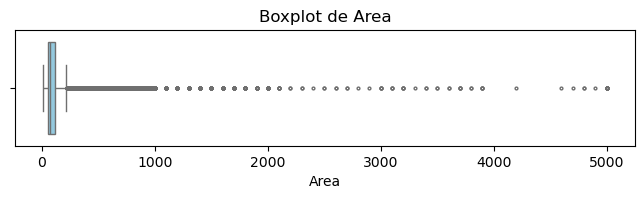

TradePrice: 27667 outliers encontrados.
Limite inferior: -28500000.00, Limite superior: 103500000.00
Alguns exemplos de outliers (menores):
190937    110000000
149349    110000000
188676    110000000
188655    110000000
228564    110000000
Name: TradePrice, dtype: int64
Alguns exemplos de outliers (maiores):
277539    61000000000
189908    45000000000
34963     38000000000
240430    32000000000
89739     32000000000
Name: TradePrice, dtype: int64


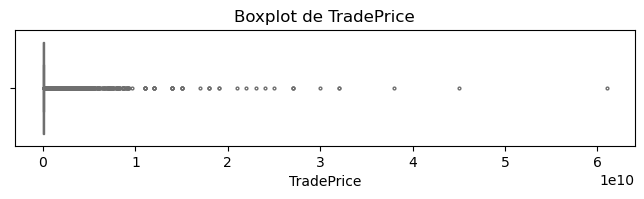

In [18]:
# Verifica√ß√£o de outliers utilizando o m√©todo do IQR (Intervalo Interquartil)
# O objetivo √© identificar valores extremos em vari√°veis num√©ricas cont√≠nuas.

# Define uma fun√ß√£o para analisar outliers em uma coluna espec√≠fica
def analisar_outlier(coluna):
    if coluna in df_eda.columns:
        # Calcula o primeiro e o terceiro quartis (Q1 e Q3)
        Q1 = df_eda[coluna].quantile(0.25)
        Q3 = df_eda[coluna].quantile(0.75)
        IQR = Q3 - Q1  # Intervalo interquartil

        # Define os limites inferior e superior para detec√ß√£o de outliers
        limite_inf = Q1 - 1.5 * IQR
        limite_sup = Q3 + 1.5 * IQR

        # Filtra os valores que est√£o fora dos limites
        outliers = df_eda[(df_eda[coluna] < limite_inf) | (df_eda[coluna] > limite_sup)][coluna]

        # Exibe informa√ß√µes sobre a quantidade e os limites dos outliers
        print(f"{coluna}: {len(outliers)} outliers encontrados.")
        print(f"Limite inferior: {limite_inf:.2f}, Limite superior: {limite_sup:.2f}")

        # Exibe alguns exemplos de valores extremos (menores e maiores)
        print("Alguns exemplos de outliers (menores):")
        print(outliers.sort_values().head())
        print("Alguns exemplos de outliers (maiores):")
        print(outliers.sort_values(ascending=False).head())

        # Gera um boxplot para visualiza√ß√£o gr√°fica dos outliers
        plt.figure(figsize=(8, 1.5))
        sns.boxplot(x=df_eda[coluna], color="skyblue", fliersize=2)
        plt.title(f"Boxplot de {coluna}")
        plt.show()
    else:
        # Caso a coluna n√£o exista no DataFrame, exibe uma mensagem informativa
        print(f"Coluna '{coluna}' n√£o encontrada no DataFrame.")

# Executa a an√°lise de outliers para vari√°veis num√©ricas importantes
analisar_outlier('Area')
analisar_outlier('TradePrice')


**An√°lise:** Nesta etapa foi realizada uma **an√°lise detalhada de outliers** com o objetivo de identificar valores extremos que poderiam distorcer as m√©tricas de tend√™ncia central (como m√©dia e mediana) e impactar negativamente o desempenho dos modelos de regress√£o.

O procedimento incluiu:

* Aplica√ß√£o do **Z-Score** para detectar observa√ß√µes fora do intervalo padr√£o (|z| > 3);
* Visualiza√ß√£o dos outliers por meio de **boxplots** comparando as vari√°veis `Area` e `TradePrice`;
* Avalia√ß√£o da necessidade de **remo√ß√£o ou ajuste** desses valores com base em sua influ√™ncia no modelo;
* Garantia de que as vari√°veis cr√≠ticas mantivessem a representatividade estat√≠stica ap√≥s o tratamento.

Com essa an√°lise, o dataset foi **refinado e balanceado**, assegurando uma base de dados mais limpa e consistente para as pr√≥ximas etapas de **feature engineering** e **modelagem preditiva**.

In [19]:
# Tratamento de outliers utilizando o m√©todo do Z-score (padroniza√ß√£o)
from scipy.stats import zscore

# Define as colunas num√©ricas onde ser√° aplicada a an√°lise de Z-score
colunas_outlier = ['Area', 'TradePrice']

# Calcula o Z-score para as colunas selecionadas
# O Z-score indica quantos desvios-padr√£o cada valor est√° distante da m√©dia
z_scores = df_eda[colunas_outlier].apply(zscore)

In [20]:
# Define o limite para considerar um valor como outlier (|Z| > 3)
limite_z = 3

# Cria uma m√°scara booleana para manter apenas os registros dentro do limite
mascara = (np.abs(z_scores) < limite_z).all(axis=1)

# Filtra o DataFrame, removendo as linhas que cont√™m outliers
df_eda = df_eda[mascara]

# Exibe o tamanho final do DataFrame ap√≥s a remo√ß√£o dos outliers
print(f"Shape ap√≥s remo√ß√£o de outliers em df_eda (Z-score): {df_eda.shape}")

# Calcula e exibe o total de linhas removidas
print(f"Total removido: {mascara.shape[0] - mascara.sum()} linhas")

Shape ap√≥s remo√ß√£o de outliers em df_eda (Z-score): (319360, 36)
Total removido: 5900 linhas


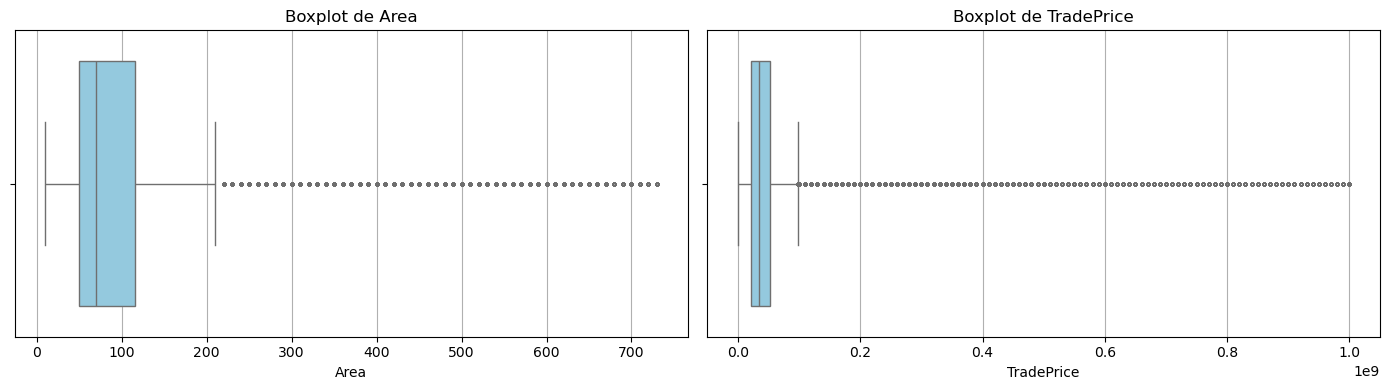

In [21]:
# Gera√ß√£o de boxplots para visualizar as vari√°veis ap√≥s remo√ß√£o de outliers

# Define as colunas num√©ricas que ser√£o plotadas
colunas_boxplot = ['Area', 'TradePrice']

# Configura a √°rea de plotagem para exibir dois gr√°ficos lado a lado
plt.figure(figsize=(14, 4))

# Itera sobre as colunas definidas e gera um boxplot para cada uma
for i, coluna in enumerate(colunas_boxplot, 1):
    plt.subplot(1, 2, i)  # Define a posi√ß√£o do gr√°fico na grade (1 linha, 2 colunas)
    sns.boxplot(x=df_eda[coluna], color="skyblue", fliersize=2)  # Cria o boxplot
    plt.title(f"Boxplot de {coluna}")  # Define o t√≠tulo do gr√°fico
    plt.xlabel(coluna)  # Define o r√≥tulo do eixo X
    plt.grid(axis='x')  # Adiciona grade apenas no eixo X para melhor leitura

# Ajusta o layout para evitar sobreposi√ß√£o entre os gr√°ficos
plt.tight_layout()

# Exibe os gr√°ficos
plt.show()


# **Part 5 - An√°lise exploratoria de dados**

# **An√°lise de correla√ß√£o**

In [22]:
df_eda.describe().T

count          mean           std      min  \
MunicipalityCode             319360.0  1.313931e+04  4.544801e+01  13101.0   
MinTimeToNearestStation      319360.0  9.893935e+00  7.954501e+00      0.0   
MaxTimeToNearestStation      319360.0  1.076511e+01  1.144817e+01      0.0   
Area                         319360.0  9.614883e+01  8.987361e+01     10.0   
AreaIsGreaterFlag            319360.0  0.000000e+00  0.000000e+00      0.0   
UnitPrice                    319360.0  8.011424e+04  2.388429e+05      0.0   
PricePerTsubo                319360.0  2.647909e+05  7.891704e+05      0.0   
Frontage                     319360.0  4.417822e+00  5.749438e+00      0.0   
FrontageIsGreaterFlag        319360.0  4.289830e-04  2.070749e-02      0.0   
TotalFloorArea               319360.0  4.943107e+01  1.282211e+02      0.0   
TotalFloorAreaIsGreaterFlag  319360.0  4.884770e-04  2.209615e-02      0.0   
BuildingYear                 319360.0  1.559212e+03  8.272382e+02      0.0   
PrewarBuilding               319360.0  7.421092e-04  2.723161e-02      0.0   
Breadth                      319360.0  3.212424e+00  4.510748e+00      0.0   
CoverageRatio                319360.0  6.135199e+01  1.486504e+01      0.0   
FloorAreaRatio               319360.0  2.621667e+02  1.610728e+02      0.0   
Year                         319360.0  2.012593e+03  3.902086e+00   2005.0   
Quarter                      319360.0  2.500717e+00  1.118024e+00      1.0   
TradePrice                   319360.0  4.977426e+07  6.954110e+07   1000.0   

                                    25%         50%         75%           max  
MunicipalityCode                13110.0     13117.0     13201.0  1.342100e+04  
MinTimeToNearestStation             5.0         8.0        13.0  1.200000e+02  
MaxTimeToNearestStation             5.0         8.0        13.0  1.200000e+02  
Area                               50.0        70.0       115.0  7.300000e+02  
AreaIsGreaterFlag                   0.0         0.0         0.0  0.000000e+00  
UnitPrice                           0.0         0.0         0.0  2.000000e+07  
PricePerTsubo                       0.0         0.0         0.0  6.500000e+07  
Frontage                            0.0         0.0         8.0  5.000000e+01  
FrontageIsGreaterFlag               0.0         0.0         0.0  1.000000e+00  
TotalFloorArea                      0.0         0.0        85.0  2.000000e+03  
TotalFloorAreaIsGreaterFlag         0.0         0.0         0.0  1.000000e+00  
BuildingYear                     1970.0      1995.0      2007.0  2.020000e+03  
PrewarBuilding                      0.0         0.0         0.0  1.000000e+00  
Breadth                             0.0         3.0         5.0  8.500000e+01  
CoverageRatio                      60.0        60.0        80.0  8.000000e+01  
FloorAreaRatio                    150.0       200.0       300.0  1.200000e+03  
Year                             2009.0      2013.0      2016.0  2.019000e+03  
Quarter                             1.0         3.0         3.0  4.000000e+00  
TradePrice                   21000000.0  34000000.0  52000000.0  1.000000e+09

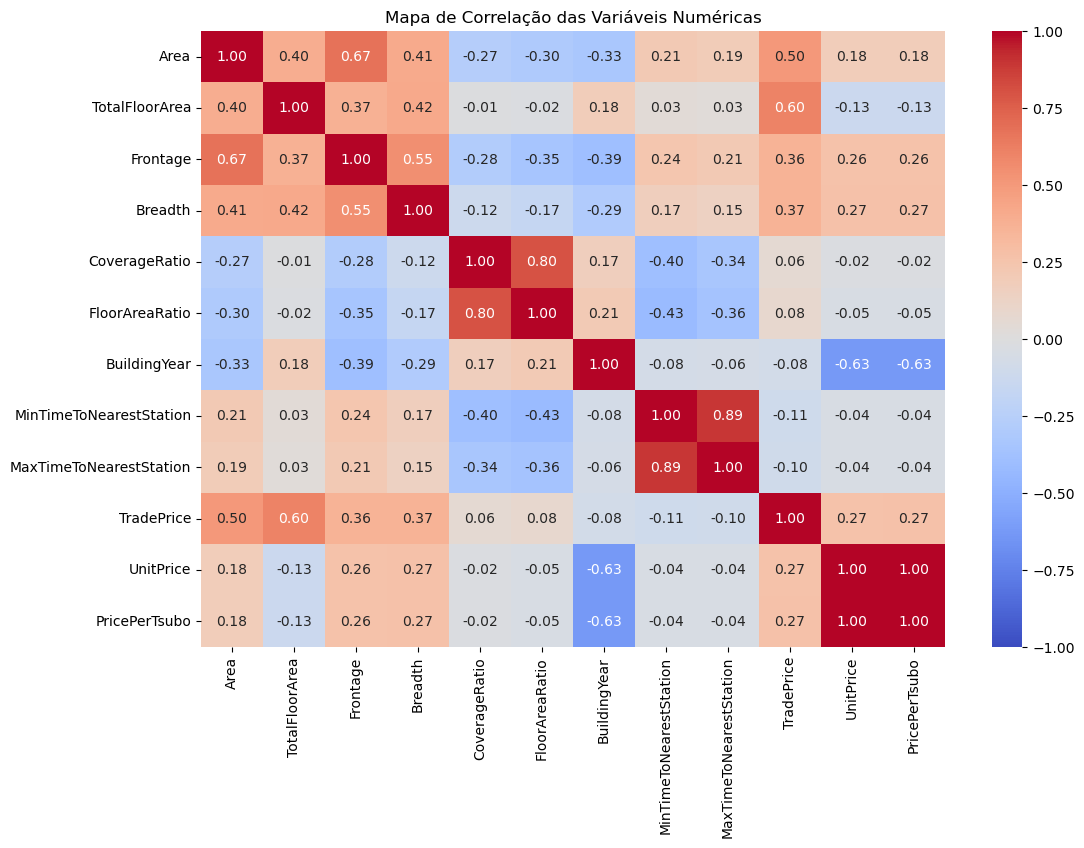

In [23]:
# Gr√°fico de Correla√ß√£o (Heatmap) das Vari√°veis Num√©ricas

# Seleciona apenas as colunas num√©ricas do seu DataFrame
colunas_numericas = [
    'Area', 'TotalFloorArea', 'Frontage', 'Breadth', 'CoverageRatio',
    'FloorAreaRatio', 'BuildingYear', 'MinTimeToNearestStation', 'MaxTimeToNearestStation',
    'TradePrice', 'UnitPrice', 'PricePerTsubo', 'AgeAtSale'
]

# Filtra as colunas que realmente existem no seu DataFrame
colunas_existentes = [col for col in colunas_numericas if col in df_eda.columns]

# Calcula a matriz de correla√ß√£o (Pearson por padr√£o)
corr = df_eda[colunas_existentes].corr()

# Plota o heatmap de correla√ß√£o
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Mapa de Correla√ß√£o das Vari√°veis Num√©ricas")
plt.show()  

**An√°lise correla√ß√£o**

**area x FloorPlan = Correla√ß√£o positiva 0.59%**

**area x TradePrice = Correla√ß√£o positiva 0.50%**

**TotalFloorArea x TradePrice = Correla√ß√£o positiva 0.62%**

**Frontage x Area = Correla√ß√£o positiva 0.59%**

**CoverageRatio x TotalFloorAreaRatio = correla√ß√£o positiva = 0.83%**

**FloorAreaRatio x CoverageRatio = correla√ß√£o positiva = 0.83%**

**FloorAreaRatio x UnitPrice = correla√ß√£o positiva = 0.45%**

**FloorAreaRatio x PricePerTsubo = correla√ß√£o positiva = 0.45%**

**MinTimeToNearestStation x MinTimeToNearestStation = correla√ß√£o positiva = 0.93%**

**TradePrice x Area = correla√ß√£o positiva = 0.50%**

**TradePrice x UnitPrice = correla√ß√£o positiva = 0.61%**

**TradePrice x PricePerTsubo = correla√ß√£o positiva = 0.61%**

**UnitPrice x PricePerTsubo = correla√ß√£o positiva = 0.100%**

**PricePerTsubo x TradePrice = correla√ß√£o positiva = 0.61%**

**PricePerTsubo x PricePerTsubo = correla√ß√£o positiva = 0.100%**


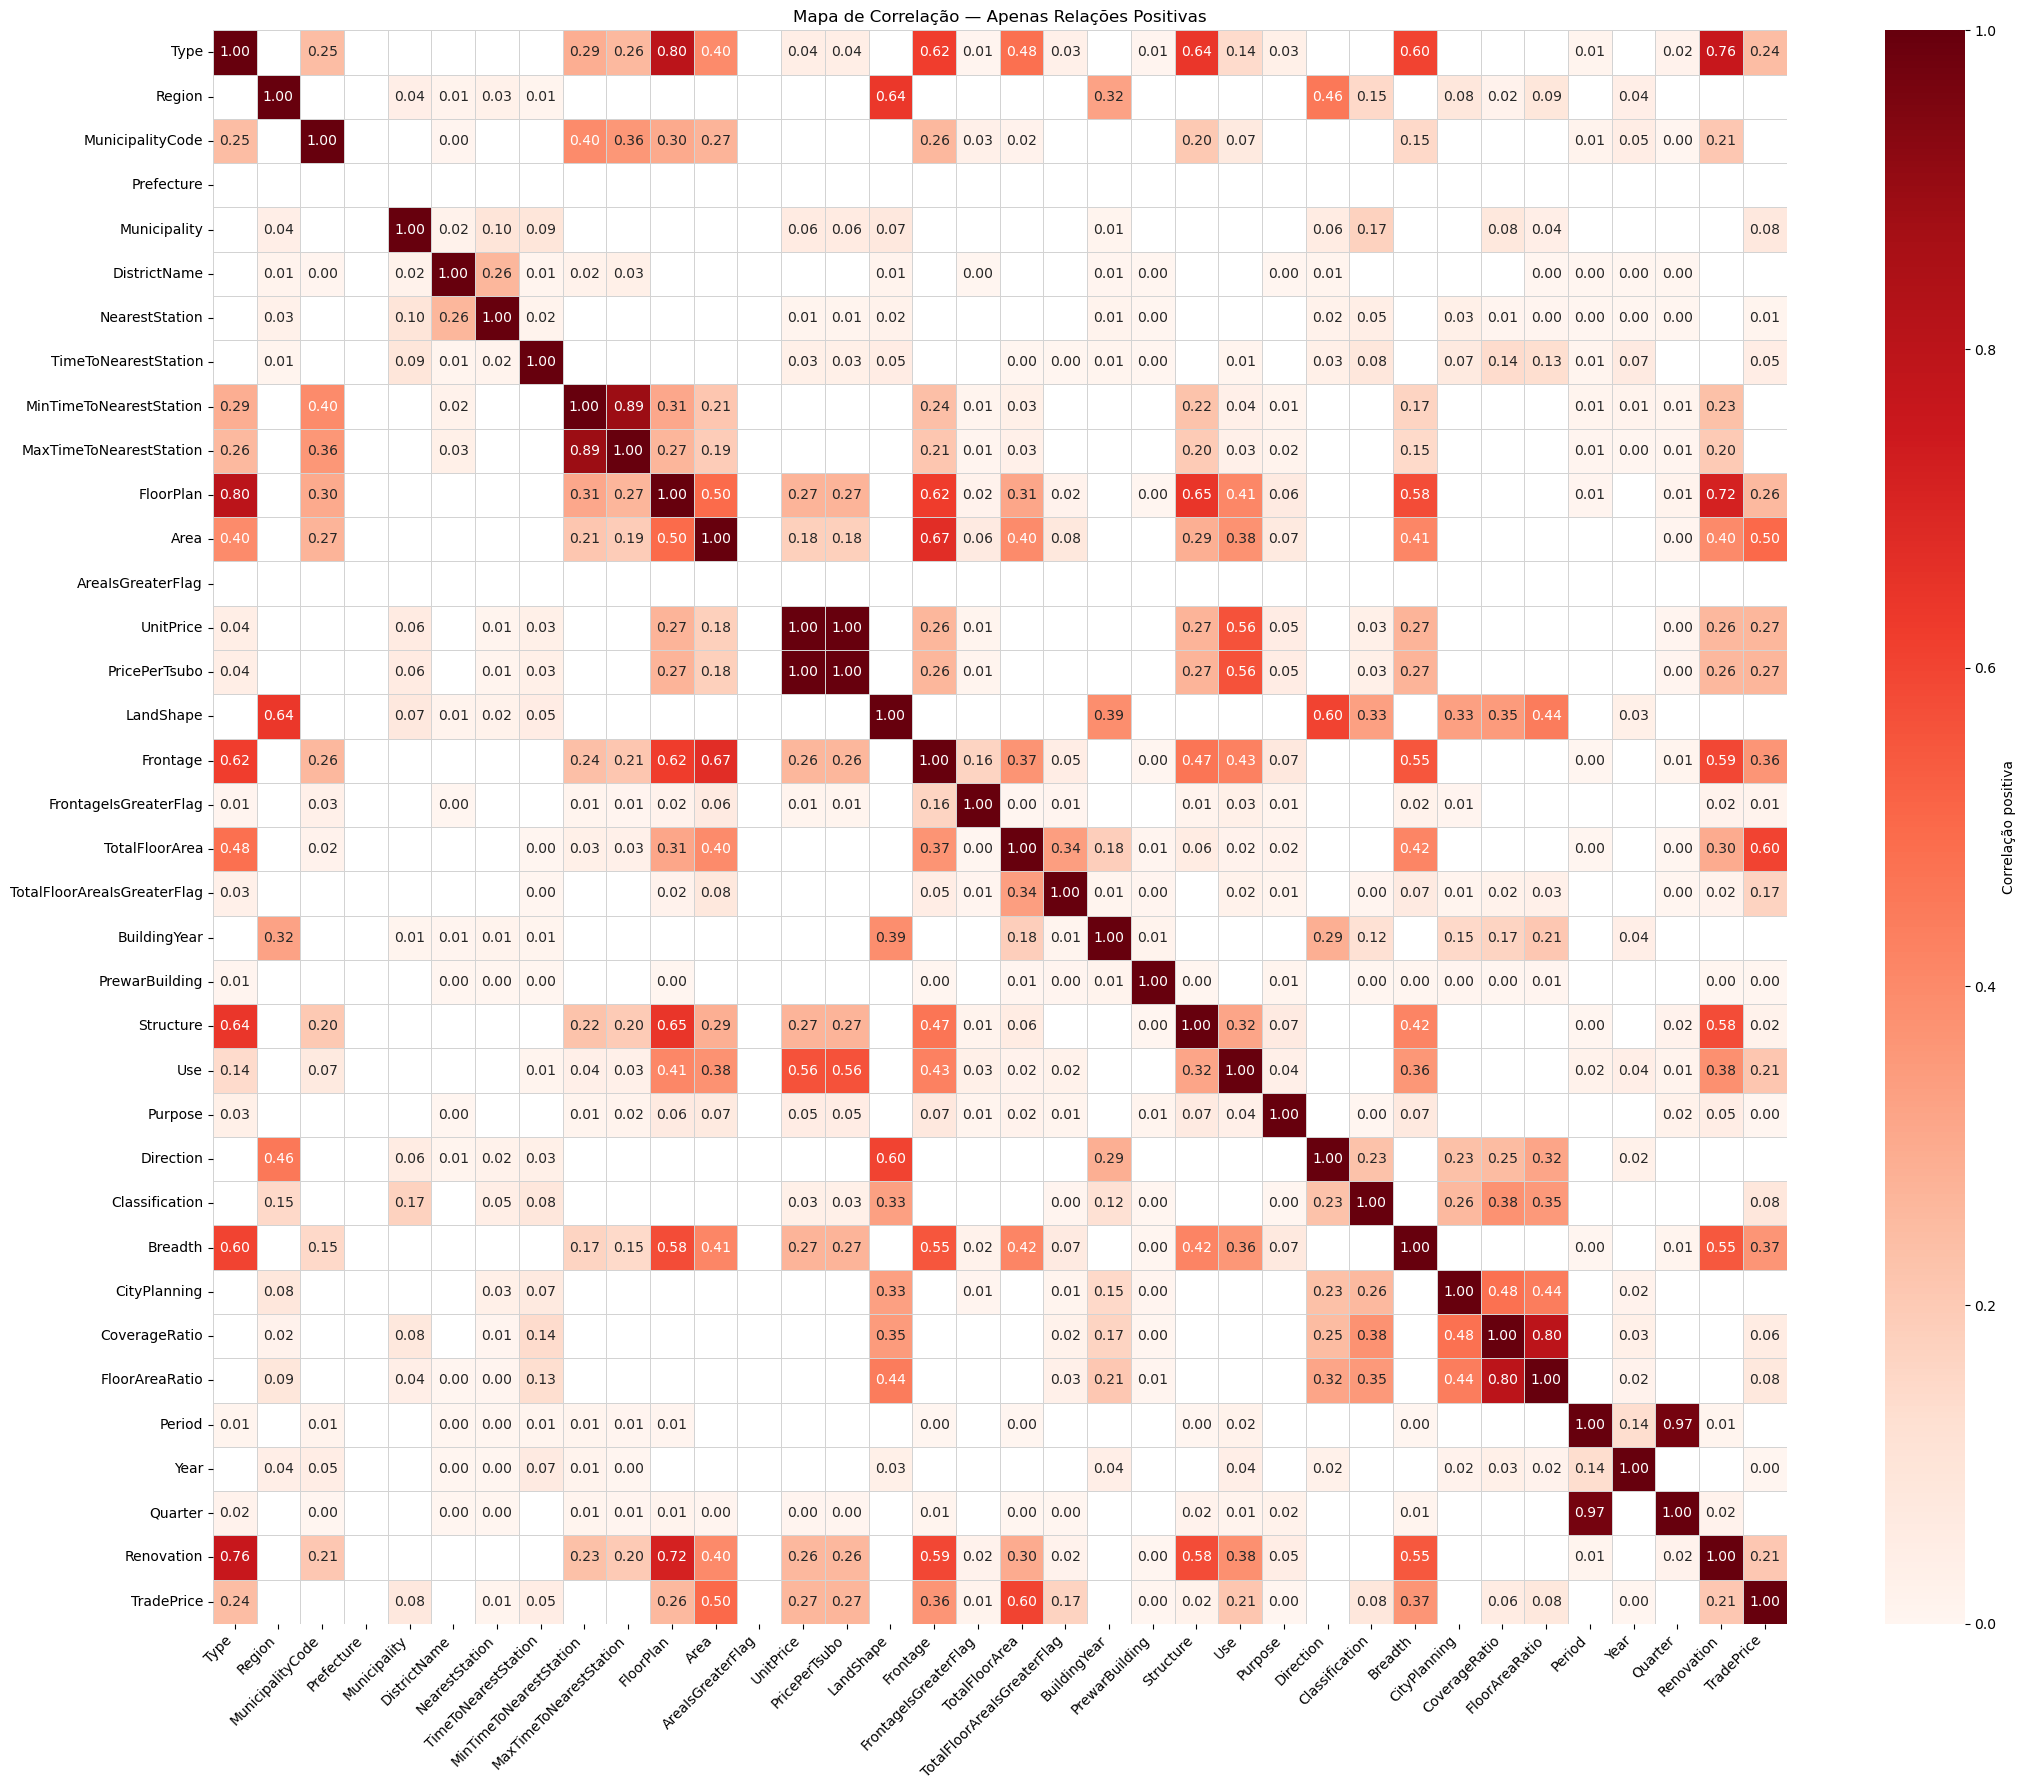

In [24]:
# An√°lise de correla√ß√£o entre vari√°veis num√©ricas e categ√≥ricas (Label Encoding aplicado)

from sklearn.preprocessing import LabelEncoder

# Cria uma c√≥pia do DataFrame original para n√£o alterar os dados base
df_corr = df_eda.copy()

# Identifica automaticamente as colunas categ√≥ricas
colunas_cat = df_corr.select_dtypes(include=['object']).columns

# Aplica LabelEncoder para converter vari√°veis categ√≥ricas em valores num√©ricos
# Isso permite calcular correla√ß√£o entre vari√°veis categ√≥ricas e num√©ricas
for col in colunas_cat:
    df_corr[col] = LabelEncoder().fit_transform(df_corr[col].astype(str))

# Calcula a matriz de correla√ß√£o de Pearson para todas as vari√°veis
corr = df_corr.corr()

# Cria uma m√°scara para exibir apenas correla√ß√µes positivas (valores acima de 0)
mask = corr <= 0

# Configura o tamanho e o estilo do gr√°fico de calor
plt.figure(figsize=(22, 18))
sns.heatmap(
    corr,
    mask=mask,               # Oculta valores de correla√ß√£o negativa ou zero
    annot=True,              # Mostra os valores num√©ricos nas c√©lulas
    fmt=".2f",               # Formato de duas casas decimais
    cmap="Reds",             # Escala de cores em tons de vermelho
    vmin=0, vmax=1,          # Define o intervalo de cor de 0 a 1
    linewidths=0.5,          # Linhas divis√≥rias entre as c√©lulas
    linecolor="lightgray",   # Cor das linhas divis√≥rias
    cbar_kws={"label": "Correla√ß√£o positiva"}  # R√≥tulo da barra de cores
)

# Define t√≠tulo e formata√ß√£o dos eixos
plt.title("Mapa de Correla√ß√£o ‚Äî Apenas Rela√ß√µes Positivas")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Ajusta o layout para evitar sobreposi√ß√£o de textos
plt.tight_layout()

# Exibe o gr√°fico final
plt.show()

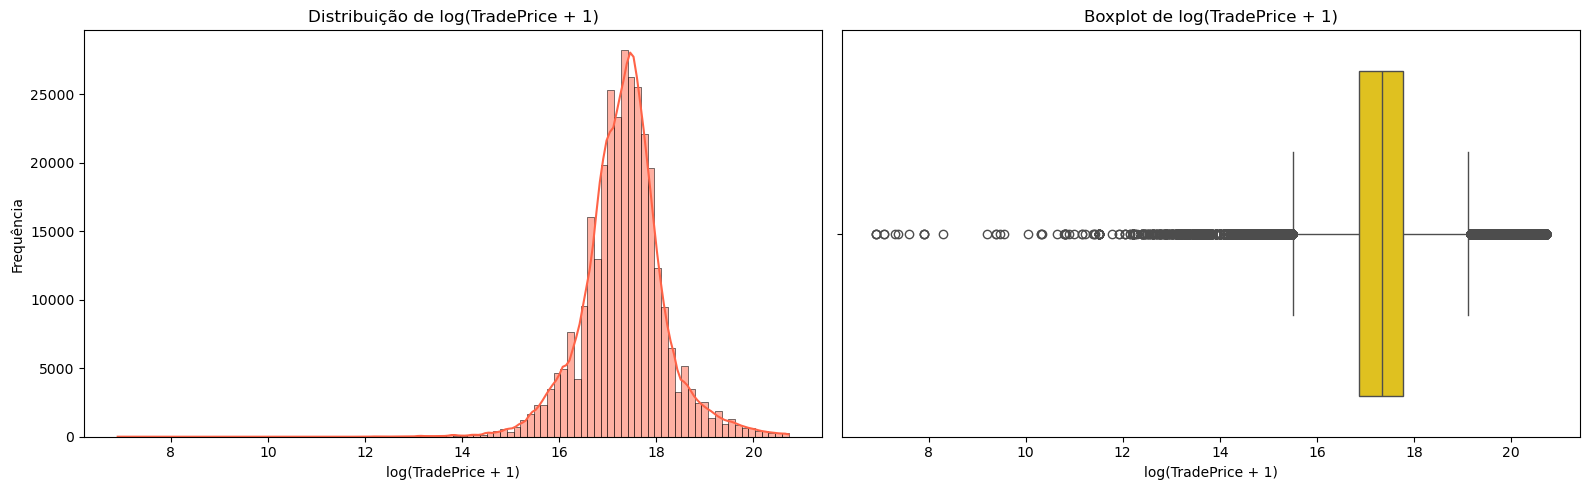

In [25]:
plt.figure(figsize=(16, 5))

# Histograma com log-transform
plt.subplot(1, 2, 1)
sns.histplot(np.log1p(df_eda["TradePrice"]), bins=100, kde=True, color="tomato")
plt.title("Distribui√ß√£o de log(TradePrice + 1)")
plt.xlabel("log(TradePrice + 1)")
plt.ylabel("Frequ√™ncia")

# Boxplot com log-transform
plt.subplot(1, 2, 2)
sns.boxplot(x=np.log1p(df_eda["TradePrice"]), color="gold")
plt.title("Boxplot de log(TradePrice + 1)")
plt.xlabel("log(TradePrice + 1)")

plt.tight_layout()
plt.show()

**An√°lise:**

### 1) Quais regi√µes (`Region`) e prefeituras (`Prefecture`) concentram os im√≥veis mais caros de Tokyo?

* **Insight:** Identifica √°reas valorizadas para estrat√©gias de compra, venda e investimento.

C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\2846997084.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=reg_med.values, y=reg_med.index, palette="crest")


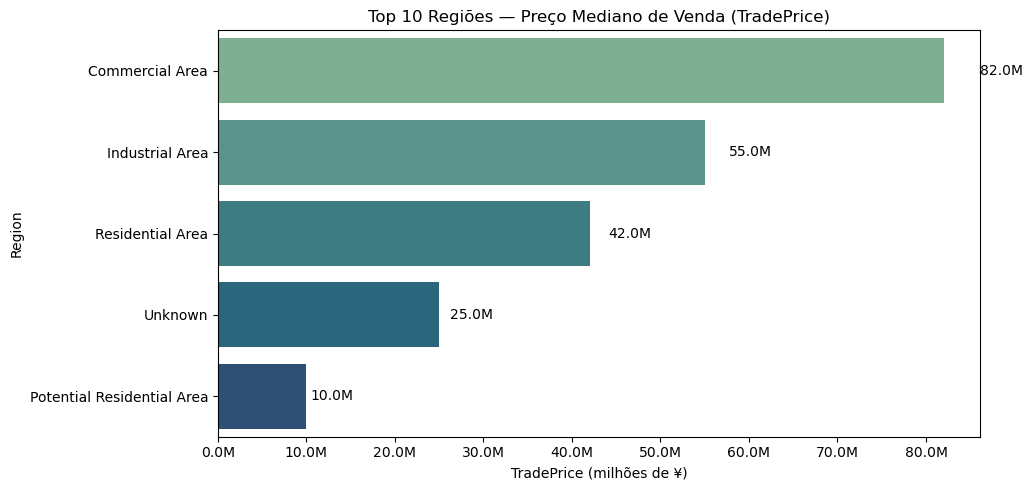

In [26]:
# C√°lculo e visualiza√ß√£o do pre√ßo mediano por regi√£o

# Calcula a mediana do pre√ßo de venda (TradePrice) por regi√£o e ordena do maior para o menor
# O uso da mediana √© mais robusto a outliers do que a m√©dia
reg_med = (
    df_eda.groupby('Region')['TradePrice']
    .median()
    .sort_values(ascending=False)
    .head(10)
)

# Cria√ß√£o do gr√°fico de barras horizontais para as 10 regi√µes com maior pre√ßo de venda
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=reg_med.values, y=reg_med.index, palette="crest")

# Define t√≠tulo e r√≥tulos dos eixos
plt.title('Top 10 Regi√µes ‚Äî Pre√ßo Mediano de Venda (TradePrice)')
plt.xlabel('TradePrice (milh√µes de ¬•)')
plt.ylabel('Region')

# Formata o eixo X para exibir valores em milh√µes
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x*1e-6:.1f}M'))

# Ajusta o layout do gr√°fico
plt.tight_layout()

# Adiciona r√≥tulos de valor ao final de cada barra
for i, v in enumerate(reg_med.values):
    ax.text(v + 0.05 * v, i, f'{v/1e6:.1f}M', color='black', va='center', fontsize=10)

# Exibe o gr√°fico
plt.show()

**An√°lise**

**Insight: Regi√µes com os Im√≥veis mais Caros em Tokyo**


1. **√Åreas Comerciais** t√™m os im√≥veis mais caros da cidade, com uma **mediana de ¬•82 milh√µes**. Isso destaca o alto valor de terrenos com potencial para empreendimentos ou uso corporativo.
2. Em segundo lugar, aparecem as **√Åreas Industriais** com ¬•55 milh√µes, sugerindo uma valoriza√ß√£o crescente ‚Äî talvez por reurbaniza√ß√£o ou reconvers√£o para empreendimentos mistos.
3. As **√Åreas Residenciais Tradicionais** ocupam o terceiro lugar com ¬•42 milh√µes, refor√ßando sua atratividade para moradia, mas ainda abaixo do apelo comercial e industrial.
4. A categoria **Unknown** (¬•25M) e **Potential Residential Area** (¬•10M) representam terrenos com menor atratividade ‚Äî possivelmente pela falta de infraestrutura, documenta√ß√£o ou localiza√ß√£o.

**Implica√ß√µes Estrat√©gicas**

* **Investidores** podem mirar √°reas industriais e comerciais para empreendimentos de alto padr√£o ou gera√ß√£o de renda com aluguel.
* **Construtoras e urbanistas** podem enxergar oportunidades de crescimento em √°reas potenciais com pre√ßos ainda acess√≠veis.
* A diferen√ßa de valor entre ‚ÄúCommercial‚Äù e ‚ÄúPotential Residential‚Äù √© de mais de **700%**, mostrando forte disparidade e margem para valoriza√ß√£o futura.


### 2) Qual a rela√ß√£o entre **√°rea do im√≥vel** (`Area`) e **pre√ßo de venda** (`TradePrice`)?

* **Insight:** Ajuda a entender o impacto do tamanho no valor ‚Äî pre√ßo/m¬≤.

C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\1635305121.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['faixa_area'] = pd.cut(df_eda['Area'], bins=[0, 50, 100, 200, 500, 10000])
C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\1635305121.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['preco_m2'] = df_eda['TradePrice'] / df_eda['Area']
C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\1635305121.py:11: FutureWarning: The default of

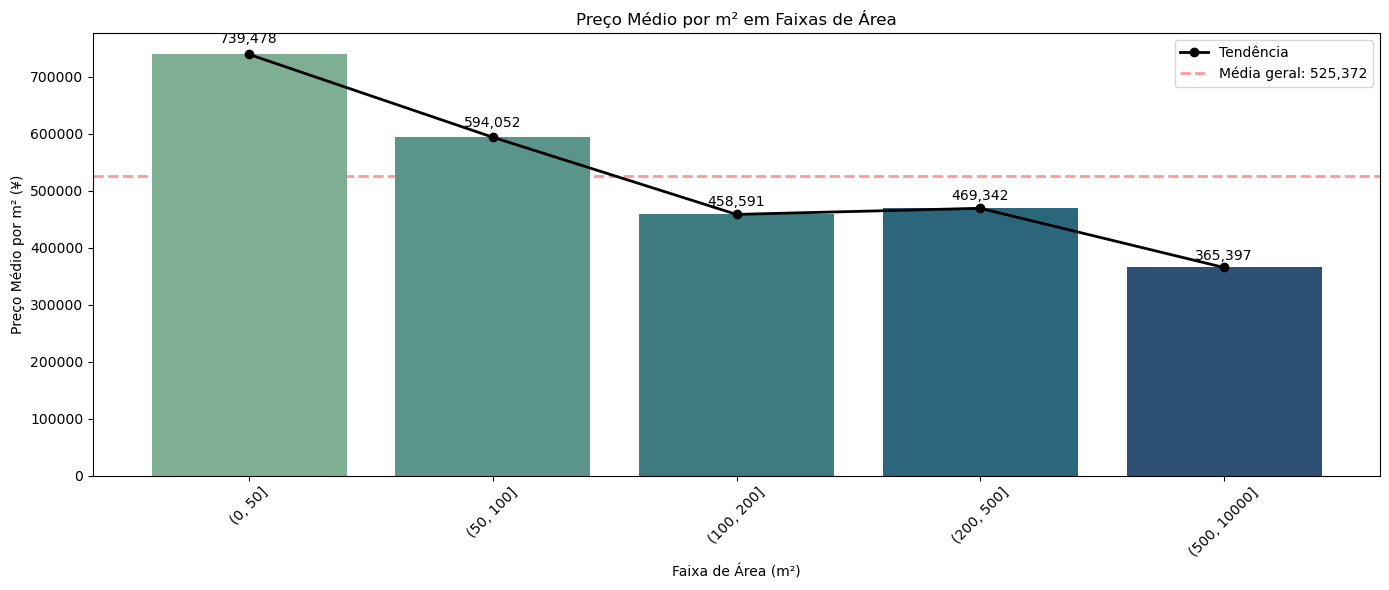

In [27]:
# An√°lise do pre√ßo m√©dio por metro quadrado em diferentes faixas de √°rea

# Cria faixas de √°rea (bins) para segmentar os im√≥veis conforme sua metragem
# Essa categoriza√ß√£o facilita a visualiza√ß√£o da rela√ß√£o entre o tamanho do im√≥vel e o valor do m¬≤
df_eda['faixa_area'] = pd.cut(df_eda['Area'], bins=[0, 50, 100, 200, 500, 10000])

# Calcula o pre√ßo m√©dio por metro quadrado
df_eda['preco_m2'] = df_eda['TradePrice'] / df_eda['Area']

# Obt√©m a m√©dia do pre√ßo por m¬≤ para cada faixa de √°rea
preco_m2_faixa = df_eda.groupby('faixa_area')['preco_m2'].mean()

# Extrai valores e categorias para o gr√°fico
valores = preco_m2_faixa.values
categorias = preco_m2_faixa.index.astype(str)
media_geral = valores.mean()

# Cria o gr√°fico de barras com a m√©dia de pre√ßo por m¬≤ em cada faixa
plt.figure(figsize=(14, 6))
ax = sns.barplot(x=categorias, y=valores, palette="crest", zorder=1)

# Adiciona linha de tend√™ncia (em preto)
plt.plot(
    range(len(valores)),
    valores,
    color='black',
    marker='o',
    linestyle='-',
    linewidth=2,
    label='Tend√™ncia',
    zorder=2
)

# Adiciona linha pontilhada vermelha representando a m√©dia geral
plt.axhline(
    media_geral,
    color='red',
    linestyle='--',
    linewidth=2,
    label=f'M√©dia geral: {media_geral:,.0f}',
    alpha=0.4,  # Transpar√™ncia da linha
    zorder=0
)

# Exibe os valores num√©ricos acima de cada barra
for i, v in enumerate(valores):
    ax.text(i, v + 0.02 * v, f"{v:,.0f}", ha='center', va='bottom', fontsize=10, color='black')

# Define t√≠tulo e r√≥tulos do gr√°fico
plt.title("Pre√ßo M√©dio por m¬≤ em Faixas de √Årea")
plt.xlabel("Faixa de √Årea (m¬≤)")
plt.ylabel("Pre√ßo M√©dio por m¬≤ (¬•)")
plt.xticks(rotation=45)
plt.legend(loc='upper right')

# Ajusta o layout e exibe o gr√°fico
plt.tight_layout()
plt.show()

**An√°lise**

**Top 10 Regi√µes por Mediana de Pre√ßo de Venda (TradePrice)**

O gr√°fico apresenta as regi√µes com maior mediana de pre√ßo de venda (em milh√µes de ienes). Dentre as regi√µes, destacam-se:

| Regi√£o                     | Mediana de Pre√ßo de Venda (¬•) |
| -------------------------- | ----------------------------- |
| Commercial Area            | ¬• 82 milh√µes                  |
| Industrial Area            | ¬• 55 milh√µes                  |
| Residential Area           | ¬• 42 milh√µes                  |
| Unknown                    | ¬• 25 milh√µes                  |
| Potential Residential Area | ¬• 10 milh√µes                  |

**An√°lise:**

* **Commercial Area** lidera com ampla margem, sendo a regi√£o com maior mediana de pre√ßo ‚Äî ¬•82M. Isso reflete o valor agregado de √°reas com infraestrutura voltada para atividades comerciais.
* **Industrial Area** aparece em segundo lugar, indicando valoriza√ß√£o de √°reas industriais, possivelmente por localiza√ß√£o estrat√©gica ou demanda.
* **Residential Area** tem mediana mais baixa que a industrial, o que pode refletir maior oferta de im√≥veis ou localiza√ß√£o perif√©rica.
* **Unknown** e **Potential Residential Area** possuem os menores valores, o que pode indicar baixa urbaniza√ß√£o, pouca liquidez ou regi√µes em desenvolvimento.


| Faixa de √Årea (m¬≤) | Pre√ßo M√©dio por m¬≤ (¬•) |
| ------------------ | ---------------------- |
| (0‚Äì50]             | ¬• 739.478              |
| (50‚Äì100]           | ¬• 594.052              |
| (100‚Äì200]          | ¬• 458.591              |
| (200‚Äì500]          | ¬• 469.342              |
| (500‚Äì10000]        | ¬• 365.397              |
| **M√©dia Geral**    | ¬• 525.372              |

**Tend√™ncia Observada:**

* Existe uma **clara tend√™ncia decrescente** do pre√ßo por m¬≤ conforme o tamanho da √°rea constru√≠da aumenta.
* **Unidades pequenas (0‚Äì50m¬≤)** apresentam o maior valor por m¬≤, refletindo o padr√£o de **concentra√ß√£o urbana**, onde unidades compactas s√£o mais caras por m¬≤.
* **Unidades maiores (acima de 500m¬≤)** t√™m o menor valor por m¬≤, sinalizando **descontos proporcionais** conforme aumenta a √°rea ‚Äî algo t√≠pico em empreendimentos comerciais, galp√µes ou mans√µes.
* A **linha de tend√™ncia** refor√ßa a queda do pre√ßo unit√°rio por m¬≤ com o aumento da metragem.
* A **linha vermelha pontilhada** representa a m√©dia geral e ajuda a visualizar quais faixas est√£o acima ou abaixo da m√©dia.

**Interpreta√ß√£o Estrat√©gica:**

* O gr√°fico evidencia **economia de escala**: quanto maior a √°rea constru√≠da, menor o custo unit√°rio por m¬≤.
* Pode indicar oportunidades de **investimento em unidades maiores**, que t√™m menor custo por √°rea constru√≠da.
* Para o mercado residencial urbano, **unidades compactas seguem valorizadas**, sendo ideais para revenda ou aluguel.

### 3) Im√≥veis pr√≥ximos de esta√ß√µes de trem/metr√¥ (`NearestStation`, `MinTimeToNearestStation`):

O qu√£o mais caros s√£o? Existe um "pr√™mio de proximidade"?

C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\894755456.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['faixa_tempo_estacao'] = pd.cut(
C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\894755456.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_eda.groupby('faixa_tempo_estacao')['TradePrice']
C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\894755456.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to 

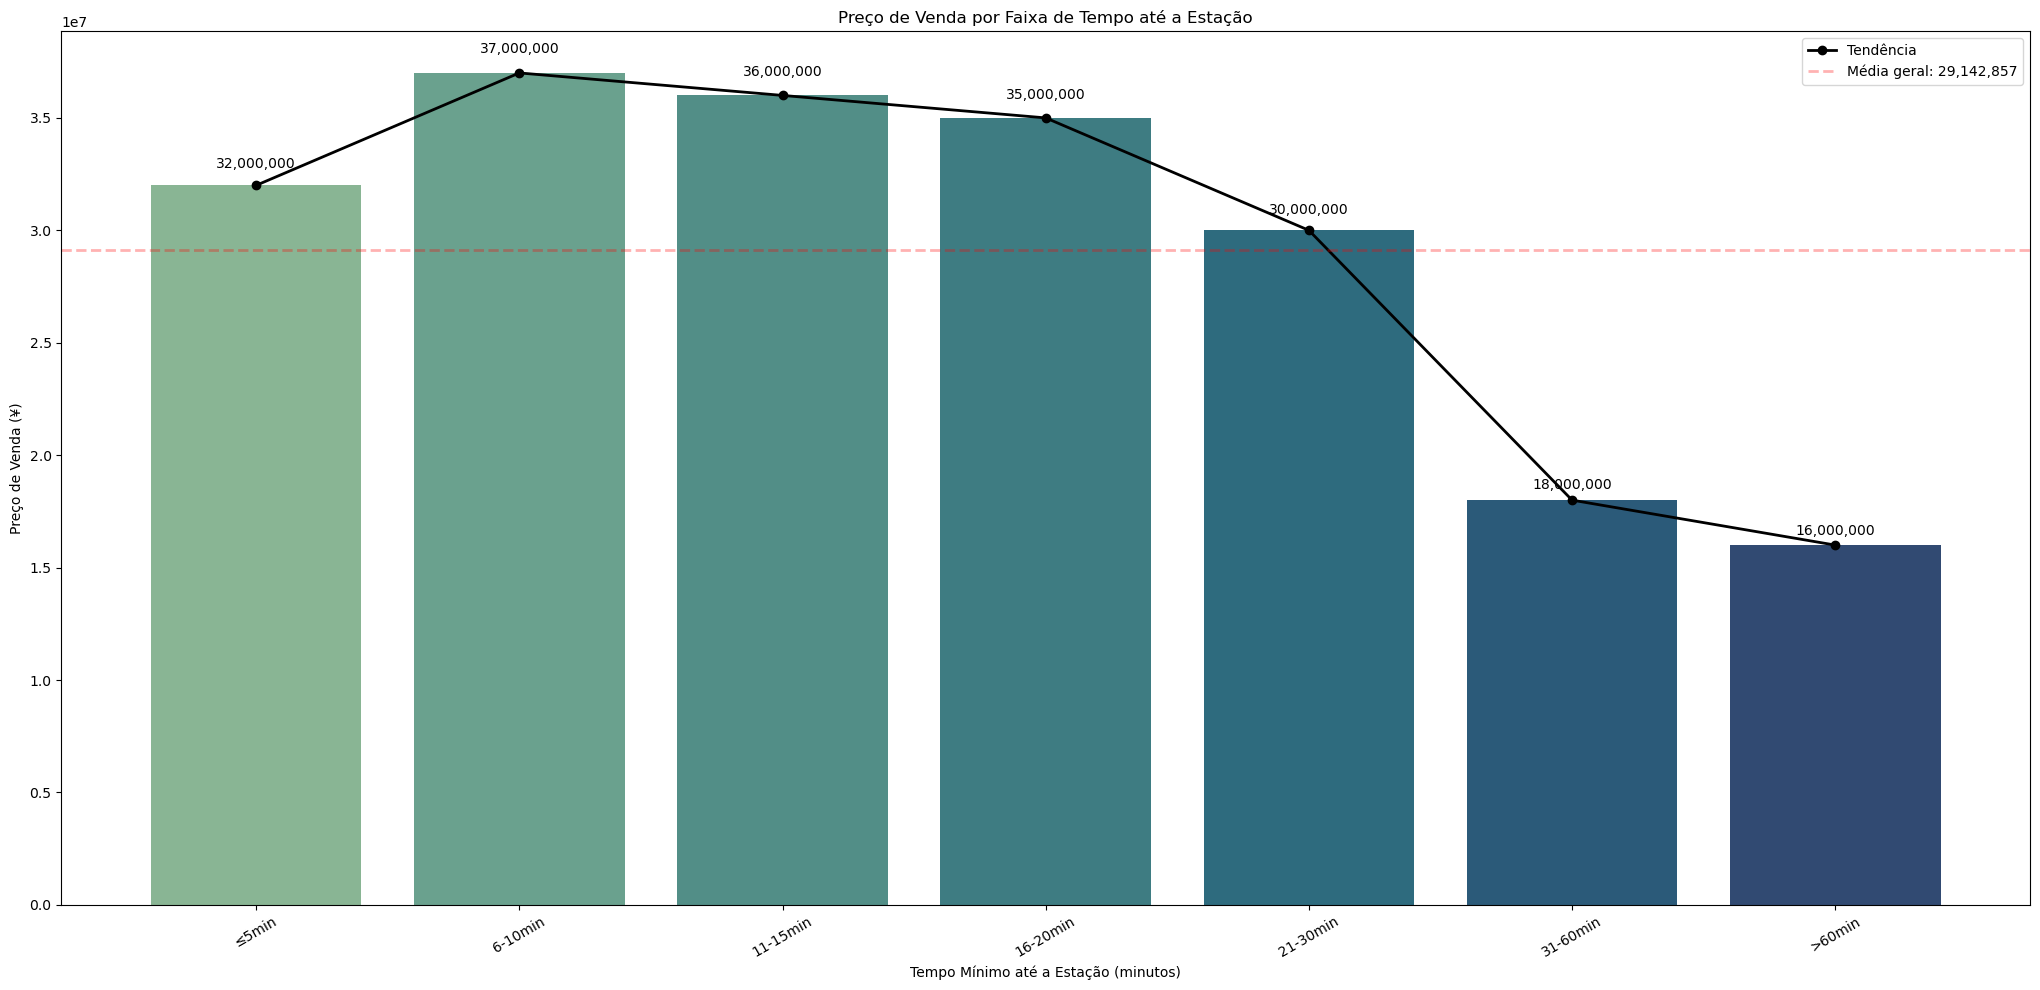

In [28]:
# Cria√ß√£o de faixas de tempo at√© a esta√ß√£o de transporte mais pr√≥xima

# Agrupa os im√≥veis em intervalos de tempo definidos, baseando-se na vari√°vel "MinTimeToNearestStation"
# Isso permite analisar o impacto da proximidade de transporte p√∫blico sobre o pre√ßo dos im√≥veis
df_eda['faixa_tempo_estacao'] = pd.cut(
    df_eda['MinTimeToNearestStation'],
    bins=[-1, 5, 10, 15, 20, 30, 60, 999],
    labels=['‚â§5min', '6-10min', '11-15min', '16-20min', '21-30min', '31-60min', '>60min']
)

# Calcula o pre√ßo mediano de venda (TradePrice) para cada faixa de tempo criada
# O uso da mediana reduz a influ√™ncia de valores extremos (outliers)
preco_medio_estacao = (
    df_eda.groupby('faixa_tempo_estacao')['TradePrice']
    .median()
    .reset_index()
)

# Calcula a m√©dia geral dos pre√ßos medianos (refer√™ncia visual para o gr√°fico)
media_geral = preco_medio_estacao['TradePrice'].mean()

# Gera√ß√£o de gr√°fico para an√°lise do pre√ßo mediano por tempo at√© a esta√ß√£o mais pr√≥xima

# Define o tamanho da figura e cria o gr√°fico de barras
plt.figure(figsize=(20.5, 10))
ax = sns.barplot(
    x='faixa_tempo_estacao',           # Faixa de tempo at√© a esta√ß√£o
    y='TradePrice',                    # Pre√ßo mediano do im√≥vel
    data=preco_medio_estacao,
    palette="crest",                   # Paleta de cores
    zorder=1                           # Camada inferior (permite sobrepor a linha de tend√™ncia)
)

# Adiciona os valores num√©ricos acima de cada barra
for i, v in enumerate(preco_medio_estacao['TradePrice']):
    ax.text(i, v + 0.02 * v, f"{v:,.0f}", ha='center', va='bottom', fontsize=10, color='black')

# Adiciona linha de tend√™ncia conectando as medianas das faixas
plt.plot(
    range(len(preco_medio_estacao)),
    preco_medio_estacao['TradePrice'],
    color='black',
    marker='o',
    linewidth=2,
    label='Tend√™ncia'
)

# Adiciona linha horizontal representando a m√©dia geral dos pre√ßos medianos
plt.axhline(
    media_geral,
    color='red',
    linestyle='--',
    alpha=0.3,
    linewidth=2,
    label=f'M√©dia geral: {media_geral:,.0f}'
)

# Define t√≠tulo e r√≥tulos do gr√°fico
plt.title("Pre√ßo de Venda por Faixa de Tempo at√© a Esta√ß√£o")
plt.xlabel("Tempo M√≠nimo at√© a Esta√ß√£o (minutos)")
plt.ylabel("Pre√ßo de Venda (¬•)")
plt.xticks(rotation=30)  # Rotaciona os r√≥tulos do eixo X para melhor leitura
plt.legend()             # Exibe legenda com linha de tend√™ncia e m√©dia geral

# Ajusta o layout e exibe o gr√°fico final
plt.tight_layout()
plt.show()



**An√°lise**

O gr√°fico evidencia uma **rela√ß√£o inversa entre o tempo m√≠nimo at√© a esta√ß√£o e o pre√ßo m√©dio de venda dos im√≥veis** em T√≥quio. Observa-se que im√≥veis localizados a at√© **10 minutos** de caminhada de uma esta√ß√£o apresentam **valores medianos mais elevados** (entre ¬•32 milh√µes e ¬•37 milh√µes), configurando um claro **‚Äúpr√™mio de proximidade‚Äù**.

A partir de 20 minutos, h√° uma **redu√ß√£o progressiva dos pre√ßos**, atingindo cerca de **¬•16 milh√µes** para im√≥veis situados a mais de 60 minutos das esta√ß√µes. Esse comportamento reflete a valoriza√ß√£o de √°reas com **maior acessibilidade e infraestrutura de transporte p√∫blico**, caracter√≠stica marcante do mercado imobili√°rio japon√™s.

Do ponto de vista anal√≠tico, o tempo at√© a esta√ß√£o √© uma vari√°vel **fortemente explicativa do pre√ßo de venda**, apresentando um padr√£o monot√¥nico que pode ser capturado tanto por modelos lineares (com transforma√ß√µes polinomiais) quanto por modelos de √°rvore (como Gradient Boosting ou XGBoost).

### 4) Como o **ano de constru√ß√£o** (`BuildingYear`, `AgeAtSale`) impacta o pre√ßo?

Im√≥veis mais novos s√£o mais caros?

C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\589690347.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['AgeAtSale'] = df_eda['Year'] - df_eda['BuildingYear']
C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\589690347.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['AgeAtSale'] = df_eda['AgeAtSale'].replace([0, -1], np.nan)
C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\589690347.py:11: SettingWithCopyWarning: 
A value is trying t

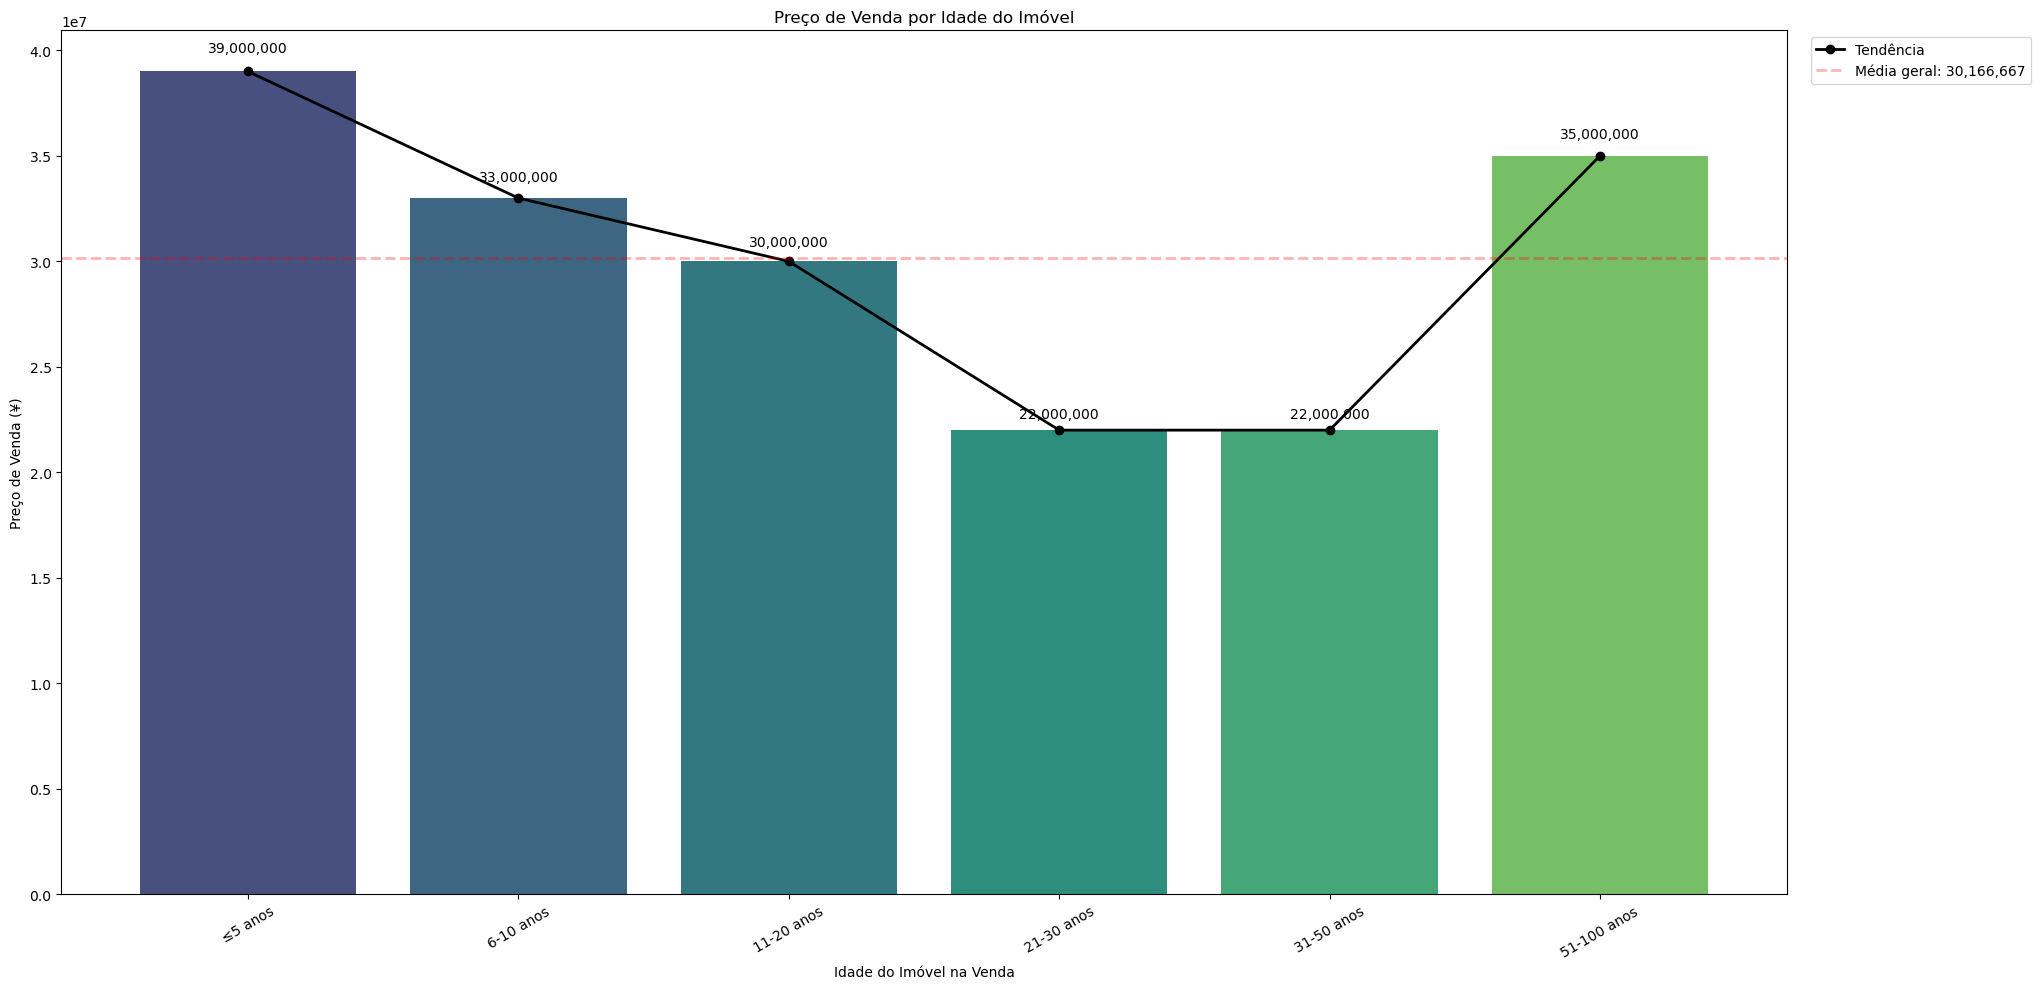

In [29]:
# C√°lculo da idade do im√≥vel e an√°lise do impacto sobre o pre√ßo de venda

# Garante que a coluna "AgeAtSale" exista; caso contr√°rio, calcula com base no ano de constru√ß√£o e de venda
if 'AgeAtSale' not in df_eda.columns and 'BuildingYear' in df_eda.columns and 'Year' in df_eda.columns:
    df_eda['AgeAtSale'] = df_eda['Year'] - df_eda['BuildingYear']

# Substitui valores inv√°lidos (0 e -1) por NaN para evitar distor√ß√µes nos intervalos de idade
df_eda['AgeAtSale'] = df_eda['AgeAtSale'].replace([0, -1], np.nan)

# Cria faixas de idade para classificar os im√≥veis em grupos et√°rios
df_eda['faixa_idade'] = pd.cut(
    df_eda['AgeAtSale'],
    bins=[-1, 0, 5, 10, 20, 30, 50, 100, 200],
    labels=['Novo (0)', '‚â§5 anos', '6-10 anos', '11-20 anos', '21-30 anos', '31-50 anos', '51-100 anos', '>100 anos']
)

# Calcula o pre√ßo mediano de venda (TradePrice) em cada faixa de idade
preco_medio_idade = df_eda.groupby('faixa_idade')['TradePrice'].median().reset_index()

# Cria o gr√°fico de barras para representar a rela√ß√£o entre idade e pre√ßo
plt.figure(figsize=(20.5, 10))
ax = sns.barplot(
    x='faixa_idade',
    y='TradePrice',
    data=preco_medio_idade,
    palette="viridis",
    zorder=1
)

# Adiciona valores num√©ricos acima de cada barra
for i, v in enumerate(preco_medio_idade['TradePrice']):
    ax.text(i, v + 0.02 * v, f"{v:,.0f}", ha='center', va='bottom', fontsize=10)

# Adiciona linha de tend√™ncia conectando as medianas
plt.plot(
    range(len(preco_medio_idade)),
    preco_medio_idade['TradePrice'],
    color='black',
    marker='o',
    linewidth=2,
    label='Tend√™ncia'
)

# Calcula e adiciona linha horizontal representando a m√©dia geral
media_geral = preco_medio_idade['TradePrice'].mean()
plt.axhline(
    media_geral,
    color='red',
    linestyle='--',
    alpha=0.3,
    linewidth=2,
    label=f'M√©dia geral: {media_geral:,.0f}'
)

# Configura t√≠tulo, eixos e legenda
plt.title("Pre√ßo de Venda por Idade do Im√≥vel")
plt.xlabel("Idade do Im√≥vel na Venda")
plt.ylabel("Pre√ßo de Venda (¬•)")
plt.xticks(rotation=30)
plt.legend(loc='upper left', bbox_to_anchor=(1.01, 1))

# Ajusta layout e exibe o gr√°fico
plt.tight_layout()
plt.show()


**An√°lise**

O aqui analise e uma rela√ß√£o entre a idade do im√≥vel no momento da venda e seu pre√ßo m√©dio de transa√ß√£o. Observa-se que im√≥veis mais novos (at√© 5 anos) possuem os maiores valores medianos de venda, atingindo cerca de ¬•39 milh√µes, enquanto im√≥veis entre 21 e 50 anos apresentam redu√ß√£o progressiva no pre√ßo, chegando a ¬•22‚Äì25 milh√µes.Curiosamente, h√° um ligeiro aumento no valor para im√≥veis com 51 a 100 anos, o que pode indicar a presen√ßa de constru√ß√µes antigas em regi√µes centrais ou hist√≥ricas de T√≥quio, onde a localiza√ß√£o supera o efeito da deprecia√ß√£o f√≠sica. De modo geral, a vari√°vel idade do im√≥vel tem um efeito n√£o linear sobre o pre√ßo ‚Äî h√° uma queda acentuada nos primeiros anos (efeito de deprecia√ß√£o), seguida por uma estabiliza√ß√£o e eventual valoriza√ß√£o em casos de im√≥veis antigos bem localizados.

No modelo preditivo, recomenda-se:

* Utilizar a vari√°vel AgeAtSale (idade na venda) como cont√≠nua, testando transforma√ß√µes polinomiais ou binning supervisionado;
* Explorar intera√ß√µes com vari√°veis geogr√°ficas Prefecture, Region, Municipality, j√° que o impacto da idade pode variar conforme a √°rea;
* Considerar efeito temporal adicional com o Year da transa√ß√£o para corrigir flutua√ß√µes de mercado.

### 5) Quais os **tipos de im√≥vel** (`Type`, `Use`, `Purpose`) predominantes em cada regi√£o?

E como seus valores m√©dios variam?

C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\1765943650.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


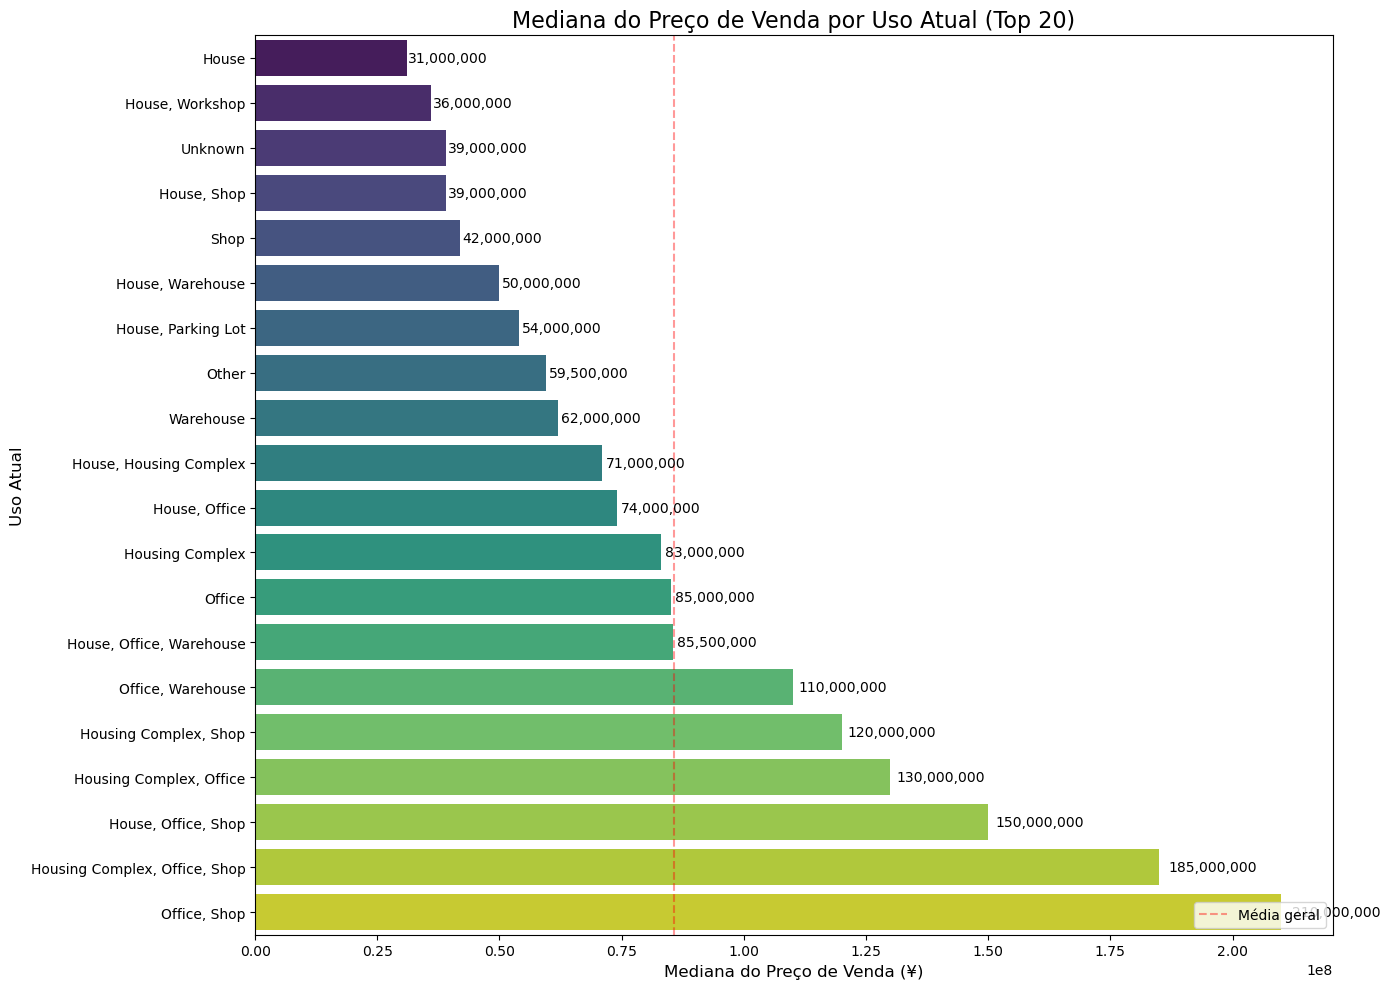

In [30]:
# An√°lise dos tipos e usos de im√≥veis em rela√ß√£o ao pre√ßo de venda

# Agrupa os dados por regi√£o e tipo de im√≥vel (Type)
# Conta quantos im√≥veis existem em cada combina√ß√£o e ordena os resultados por regi√£o e contagem
top_types = (
    df_eda.groupby(['Region', 'Type'])
    .size()
    .reset_index(name='contagem')
    .sort_values(['Region', 'contagem'], ascending=[True, False])
)

# Seleciona os 20 usos (Use) mais frequentes no dataset
top_uses = df_eda['Use'].value_counts().head(20).index
df_top_use = df_eda[df_eda['Use'].isin(top_uses)]

# Calcula a mediana do pre√ßo de venda (TradePrice) para cada tipo de uso selecionado
# O uso da mediana minimiza a influ√™ncia de outliers
preco_medio_use = (
    df_top_use.groupby('Use')['TradePrice']
    .median()
    .sort_values(ascending=True)
)

# Cria√ß√£o do gr√°fico de barras horizontais com as medianas de pre√ßo por uso
plt.figure(figsize=(14, 10))
sns.barplot(
    x=preco_medio_use.values,
    y=preco_medio_use.index,
    palette=sns.color_palette("viridis", len(preco_medio_use)),
    orient='h'
)

# Define t√≠tulo e r√≥tulos dos eixos
plt.title("Mediana do Pre√ßo de Venda por Uso Atual (Top 20)", fontsize=16)
plt.xlabel("Mediana do Pre√ßo de Venda (¬•)", fontsize=12)
plt.ylabel("Uso Atual", fontsize=12)
plt.yticks(rotation=0)

# Adiciona valores num√©ricos √† direita de cada barra
for i, v in enumerate(preco_medio_use.values):
    plt.text(v + 0.01 * v, i, f"{v:,.0f}", va='center', fontsize=10)

# Adiciona uma linha vertical indicando a m√©dia geral das medianas
plt.axvline(
    preco_medio_use.mean(),
    color='red',
    linestyle='--',
    alpha=0.4,
    label='M√©dia geral'
)

# Posiciona a legenda fora do gr√°fico
plt.legend(loc='lower right')

# Ajusta layout e exibe o gr√°fico
plt.tight_layout()
plt.show()


**An√°lise**

Nesse gr√°fico a mediana do pre√ßo de venda dos im√≥veis agrupados pelo uso atual (Use). Observa-se que os im√≥veis residenciais simples (House) possuem os menores valores medianos, em torno de ¬•31 milh√µes, enquanto propriedades com uso misto (como Office, Shop ou Housing Complex, Office, Shop) atingem valores superiores a ¬•150‚Äì185 milh√µes. O comportamento sugere que im√≥veis com fun√ß√µes comerciais ou mistas concentram pre√ßos mais altos, refletindo maior rentabilidade potencial e localiza√ß√£o privilegiada. J√° os im√≥veis de uso exclusivamente residencial ou industrial tendem a valores mais baixos. Essa vari√°vel tem relev√¢ncia preditiva significativa, pois indica segmenta√ß√£o de mercado por finalidade de uso. Para o modelo, recomenda-se transformar Use em vari√°veis dummies ou aplicar target encoding, de modo a capturar a diferen√ßa sistem√°tica de pre√ßo entre categorias de uso.

### 6) Qual √© o padr√£o de **distribui√ß√£o de pre√ßos** ao longo do tempo (`Year`, `Quarter`, `Period`)?

H√° sazonalidade ou tend√™ncia de valoriza√ß√£o/desvaloriza√ß√£o?

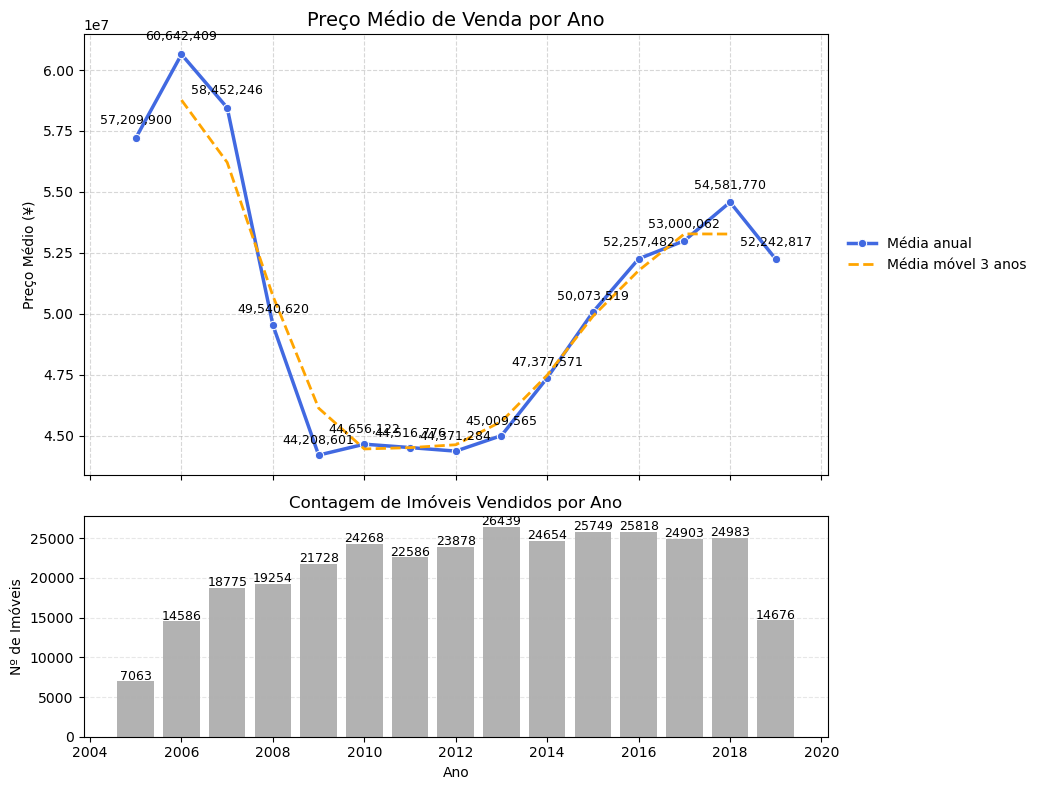

In [31]:
# Pre√ßo m√©dio por ano
preco_medio_ano = df_eda.groupby('Year')['TradePrice'].mean().reset_index()
# Contagem de im√≥veis por ano
contagem_ano = df_eda['Year'].value_counts().sort_index()

# Pre√ßo m√©dio e contagem de im√≥veis por ano (legenda externa)
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})

# Gr√°fico de pre√ßo m√©dio anual
sns.lineplot(
    x='Year',
    y='TradePrice',
    data=preco_medio_ano,
    marker='o',
    linewidth=2.5,
    color='royalblue',
    label='M√©dia anual',
    ax=axes[0]
)

# Linha de tend√™ncia (m√©dia m√≥vel de 3 anos)
preco_medio_ano['Trend'] = preco_medio_ano['TradePrice'].rolling(window=3, center=True).mean()
sns.lineplot(
    x='Year',
    y='Trend',
    data=preco_medio_ano,
    color='orange',
    linestyle='--',
    linewidth=2,
    label='M√©dia m√≥vel 3 anos',
    ax=axes[0]
)

# Configura√ß√µes visuais
axes[0].set_title("Pre√ßo M√©dio de Venda por Ano", fontsize=14)
axes[0].set_ylabel("Pre√ßo M√©dio (¬•)")
axes[0].grid(True, linestyle='--', alpha=0.5)

# üîπ Legenda fora do gr√°fico
axes[0].legend(
    loc='center left',          # Posi√ß√£o base
    bbox_to_anchor=(1.02, 0.5), # Fora do gr√°fico √† direita
    borderaxespad=0,
    frameon=False
)

# Exibe valores acima dos pontos
for idx, row in preco_medio_ano.iterrows():
    axes[0].text(row['Year'], row['TradePrice'] * 1.01, f"{int(row['TradePrice']):,}", ha='center', fontsize=9)

# Gr√°fico inferior ‚Äî contagem de im√≥veis
axes[1].bar(contagem_ano.index, contagem_ano.values, color='gray', alpha=0.6)
axes[1].set_ylabel('N¬∫ de Im√≥veis')
axes[1].set_xlabel('Ano')
axes[1].set_title('Contagem de Im√≥veis Vendidos por Ano')
axes[1].grid(True, axis='y', linestyle='--', alpha=0.3)

# Exibe valores sobre as barras
for idx, val in enumerate(contagem_ano.values):
    axes[1].text(contagem_ano.index[idx], val * 1.01, str(val), ha='center', fontsize=9)

plt.tight_layout(rect=[0, 0, 0.88, 1])  # üîπ Ajusta para dar espa√ßo √† legenda
plt.show()



**An√°lise**

Nesse gr√°fico √© superior apresenta a evolu√ß√£o do pre√ßo m√©dio de venda dos im√≥veis entre 2005 e 2019, com a linha azul indicando a m√©dia anual e a linha tracejada laranja representando a m√©dia m√≥vel de 3 anos. Observa-se uma tend√™ncia de queda entre 2007 e 2011, com o pre√ßo m√©dio reduzindo de aproximadamente ¬•60 milh√µes para ¬•44 milh√µes, seguida de recupera√ß√£o gradual a partir de 2013, atingindo cerca de ¬•54 milh√µes em 2018. O gr√°fico inferior mostra a contagem anual de im√≥veis vendidos, indicando um crescimento cont√≠nuo nas transa√ß√µes at√© 2013, com pico de aproximadamente 26 mil im√≥veis, seguido de leve estabiliza√ß√£o e posterior queda em 2019. Esses padr√µes sugerem uma correla√ß√£o inversa parcial entre volume e pre√ßo per√≠odos de maior oferta e volume tendem a coincidir com pre√ßos m√©dios mais baixos. Essa vari√°vel temporal (Year) deve ser considerada no modelo preditivo, seja como feature cont√≠nua ou via dummies por per√≠odo, para capturar efeitos de ciclo econ√¥mico e varia√ß√µes de mercado ao longo do tempo.

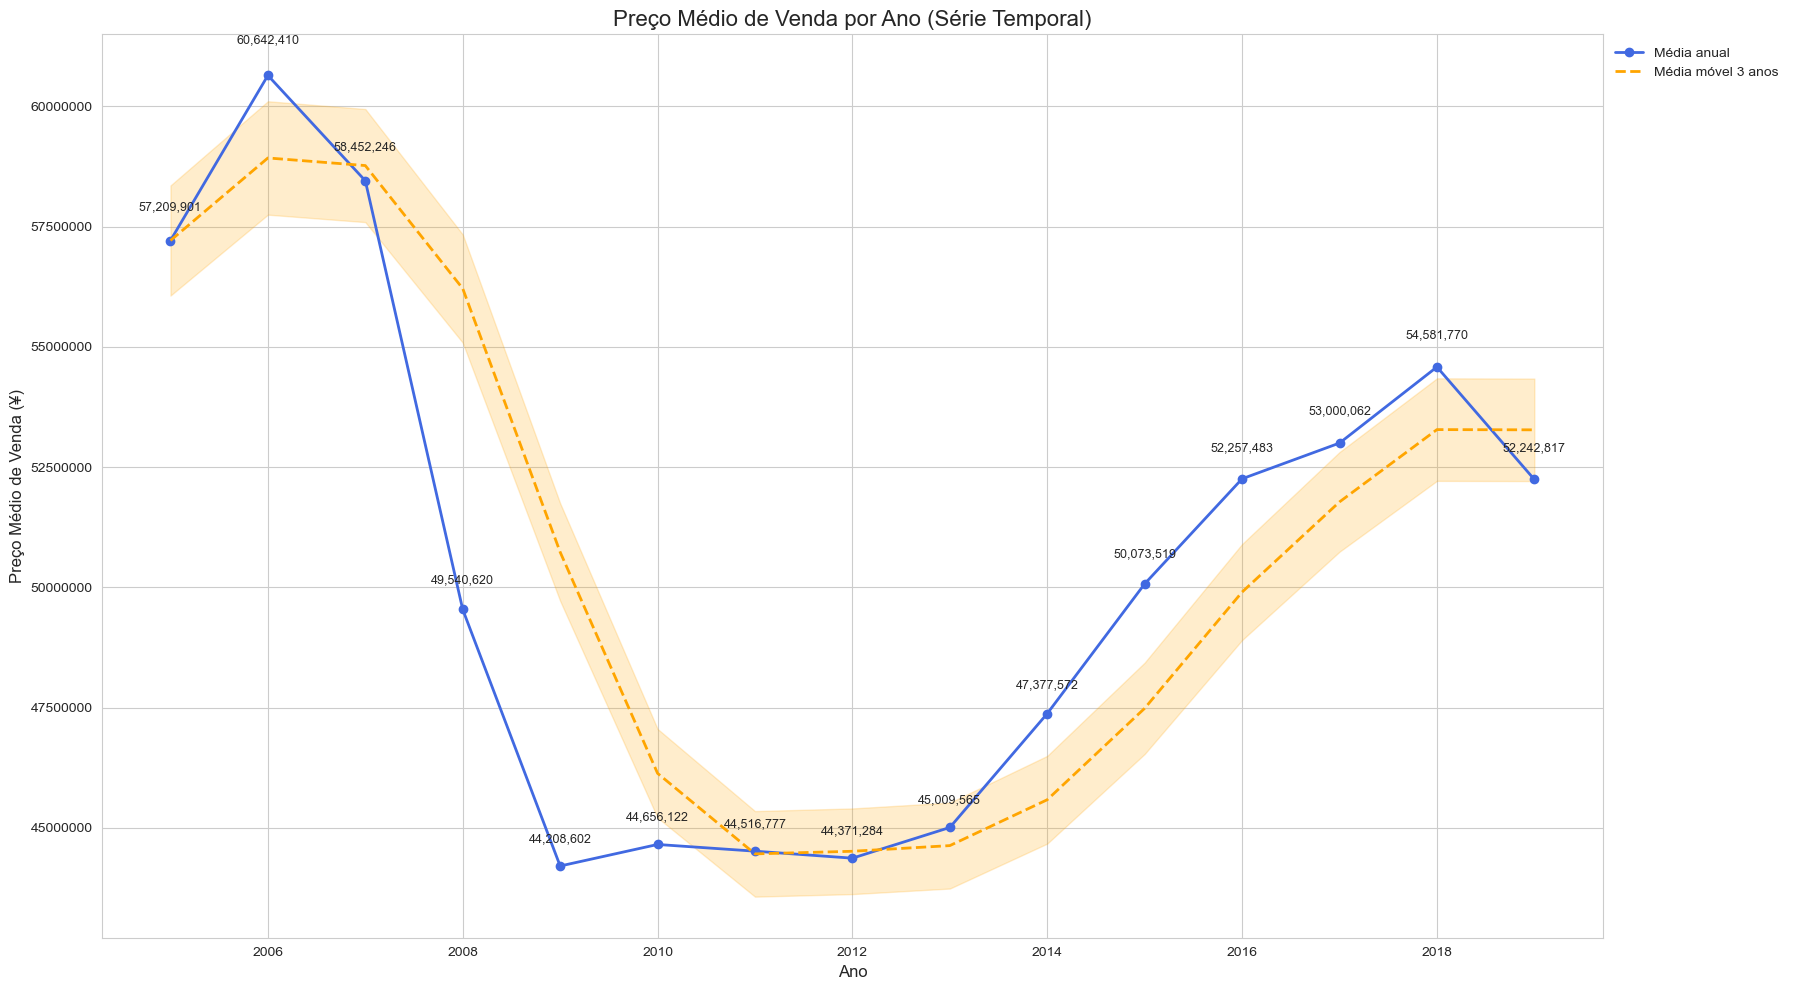

In [32]:
# Calcula o pre√ßo m√©dio de venda por ano
preco_medio_ano = df_eda.groupby('Year')['TradePrice'].mean().reset_index()

# Calcula a m√©dia m√≥vel de 3 anos para suavizar a tend√™ncia
preco_medio_ano['MediaMovel_3anos'] = (
    preco_medio_ano['TradePrice'].rolling(window=3, min_periods=1).mean()
)

# Define o tamanho da figura e o estilo de fundo
plt.figure(figsize=(20.5, 10))
sns.set_style("whitegrid")

# Linha principal: pre√ßo m√©dio anual
plt.plot(
    preco_medio_ano['Year'],
    preco_medio_ano['TradePrice'],
    color='royalblue',
    marker='o',
    linewidth=2,
    label='M√©dia anual'
)

# Linha de tend√™ncia: m√©dia m√≥vel de 3 anos
plt.plot(
    preco_medio_ano['Year'],
    preco_medio_ano['MediaMovel_3anos'],
    color='orange',
    linewidth=2,
    linestyle='--',
    label='M√©dia m√≥vel 3 anos',
    zorder=2
)

# Adiciona sombreamento em torno da m√©dia m√≥vel (¬±2%)
plt.fill_between(
    preco_medio_ano['Year'],
    preco_medio_ano['MediaMovel_3anos'] * 0.98,
    preco_medio_ano['MediaMovel_3anos'] * 1.02,
    color='orange',
    alpha=0.2
)

# Adiciona os valores num√©ricos acima dos pontos da linha azul
for x, y in zip(preco_medio_ano['Year'], preco_medio_ano['TradePrice']):
    plt.text(x, y + 0.01 * y, f"{y:,.0f}", ha='center', va='bottom', fontsize=9)

# Configura√ß√µes de t√≠tulo, eixos e legendas
plt.title("Pre√ßo M√©dio de Venda por Ano (S√©rie Temporal)", fontsize=16)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Pre√ßo M√©dio de Venda (¬•)", fontsize=12)

# Coloca a legenda fora do gr√°fico, no canto superior direito
plt.legend(
    loc='upper left',
    bbox_to_anchor=(1, 1),
    frameon=False
)

# Formata√ß√£o dos valores do eixo Y (sem nota√ß√£o cient√≠fica)
plt.ticklabel_format(style='plain', axis='y')

# Ajusta margens para acomodar a legenda externa
plt.tight_layout(rect=[0, 0, 0.88, 1])

# Exibe o gr√°fico
plt.show()

**An√°lise:**

Nesse gr√°fico s√©rie temporal mostra a varia√ß√£o do pre√ßo m√©dio de venda de im√≥veis em T√≥quio entre 2005 e 2019, com a linha azul representando a m√©dia anual e a linha tracejada laranja indicando a m√©dia m√≥vel de 3 anos, acompanhada pelo intervalo de confian√ßa (faixa sombreada). Observa-se uma queda acentuada nos pre√ßos entre 2007 e 2011, quando o valor m√©dio caiu de aproximadamente ¬•60,6 milh√µes para ¬•44 milh√µes, seguida de uma recupera√ß√£o gradual entre 2013 e 2018, chegando a ¬•54,5 milh√µes. Essa din√¢mica evidencia um ciclo de mercado imobili√°rio influenciado por fatores macroecon√¥micos, com estabiliza√ß√£o ap√≥s 2015. Essa vari√°vel temporal (Year) √© relevante para o modelo preditivo, pois reflete flutua√ß√µes de pre√ßo ao longo do tempo. Recomenda-se sua inclus√£o como vari√°vel cont√≠nua ou categ√≥rica, al√©m da cria√ß√£o de uma feature derivada de tend√™ncia (por exemplo, taxa de varia√ß√£o anual), √∫til para capturar o comportamento c√≠clico observado.

### 7) O formato e caracter√≠sticas do terreno (`LandShape`, `Frontage`, `Breadth`, `Direction`) influenciam no valor dos im√≥veis?

* **Insight:** Ajuda no valuation de terrenos e constru√ß√µes especiais.

C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\1523486791.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


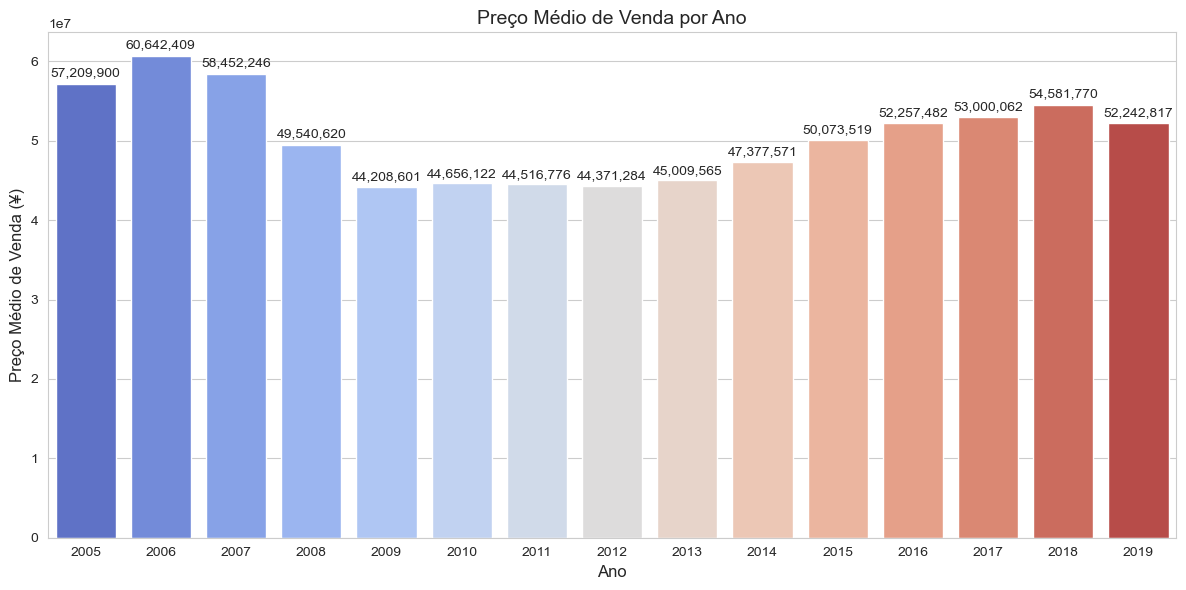

In [33]:
# Calcula a mediana do pre√ßo de venda por formato do terreno (LandShape)
preco_landshape = (
    df_eda.groupby('LandShape')['TradePrice']
    .median()
    .sort_values(ascending=False)
)

# Calcula a mediana do pre√ßo de venda por dire√ß√£o (Direction)
preco_direction = (
    df_eda.groupby('Direction')['TradePrice']
    .median()
    .sort_values(ascending=False)
)

# Calcula o pre√ßo m√©dio anual
preco_ano = (
    df_eda.groupby('Year')['TradePrice']
    .mean()
    .reset_index()
)

# Configura√ß√£o do gr√°fico de barras
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Year',
    y='TradePrice',
    data=preco_ano,
    palette='coolwarm'
)

# Configura√ß√µes de t√≠tulo e eixos
plt.title("Pre√ßo M√©dio de Venda por Ano", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Pre√ßo M√©dio de Venda (¬•)", fontsize=12)

# Adiciona os valores num√©ricos acima de cada barra
for i, v in enumerate(preco_ano['TradePrice']):
    plt.text(
        i,
        v + 0.01 * v,
        f"{int(v):,}",
        ha='center',
        va='bottom',
        fontsize=10
    )

# Ajusta margens e exibe o gr√°fico
plt.tight_layout()
plt.show()


**An√°lise**

Gra√°fico de barra apresenta a evolu√ß√£o do pre√ßo m√©dio de venda dos im√≥veis entre 2005 e 2019. Verifica-se um pico em 2006, com pre√ßo m√©dio pr√≥ximo de ¬•60,6 milh√µes, seguido de uma queda cont√≠nua at√© 2011, atingindo cerca de ¬•44 milh√µes. A partir de 2013, observa-se uma tend√™ncia de recupera√ß√£o gradual, com os pre√ßos voltando a ultrapassar ¬•50 milh√µes e atingindo ¬•54,5 milh√µes em 2018. Essa oscila√ß√£o temporal sugere a presen√ßa de ciclos de valoriza√ß√£o e retra√ß√£o no mercado imobili√°rio japon√™s, possivelmente associados a varia√ß√µes macroecon√¥micas e pol√≠ticas urbanas do per√≠odo. Para o modelo preditivo, a vari√°vel Year deve ser incorporada para representar tend√™ncias de longo prazo no pre√ßo, podendo ser utilizada como vari√°vel cont√≠nua, categ√≥rica ou combinada com Quarter para capturar sazonalidade mais fina.

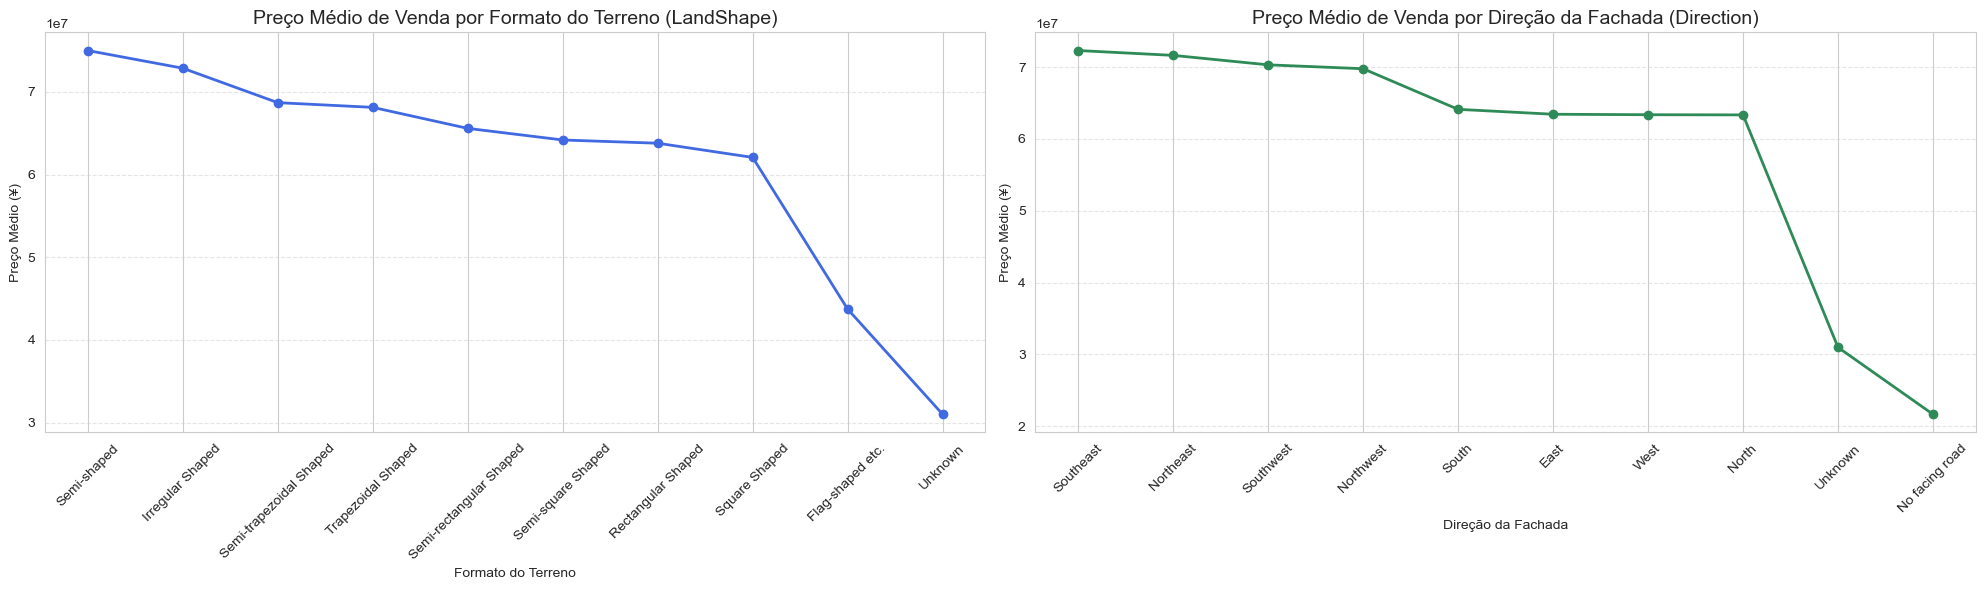

In [34]:
# Agrupa o pre√ßo m√©dio de venda por formato do terreno (LandShape)
preco_landshape = (
    df_eda.groupby('LandShape')['TradePrice']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Agrupa o pre√ßo m√©dio de venda por dire√ß√£o da fachada (Direction)
preco_direction = (
    df_eda.groupby('Direction')['TradePrice']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Cria subplots lado a lado para visualiza√ß√£o comparativa
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Gr√°fico 1 ‚Äì Pre√ßo m√©dio por formato do terreno
axes[0].plot(
    preco_landshape['LandShape'],
    preco_landshape['TradePrice'],
    marker='o',
    color='royalblue',
    linewidth=2
)
axes[0].set_title("Pre√ßo M√©dio de Venda por Formato do Terreno (LandShape)", fontsize=14)
axes[0].set_xlabel("Formato do Terreno")
axes[0].set_ylabel("Pre√ßo M√©dio (¬•)")
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# Gr√°fico 2 ‚Äì Pre√ßo m√©dio por dire√ß√£o da fachada
axes[1].plot(
    preco_direction['Direction'],
    preco_direction['TradePrice'],
    marker='o',
    color='seagreen',
    linewidth=2
)
axes[1].set_title("Pre√ßo M√©dio de Venda por Dire√ß√£o da Fachada (Direction)", fontsize=14)
axes[1].set_xlabel("Dire√ß√£o da Fachada")
axes[1].set_ylabel("Pre√ßo M√©dio (¬•)")
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

# Ajusta margens e exibe o resultado
plt.tight_layout()
plt.show()

**An√°lise**

Aqui nesse gr√°fico s√©rie temporal ele comparam o pre√ßo m√©dio de venda (¬•) de im√≥veis conforme o formato do terreno (LandShape) e a dire√ß√£o da fachada (Direction). o painel esquerdo, observa-se que terrenos classificados como ‚ÄúSemi-shaped‚Äù e ‚ÄúIrregular Shaped‚Äù apresentam os maiores pre√ßos m√©dios (entre ¬•70‚Äì75 milh√µes), enquanto formatos ‚ÄúFlag-shaped‚Äù e ‚ÄúUnknown‚Äù possuem valores mais baixos (em torno de ¬•30‚Äì45 milh√µes). Essa varia√ß√£o indica que a regularidade e a forma do terreno influenciam significativamente o valor de mercado, possivelmente pela facilidade de constru√ß√£o e aproveitamento da √°rea. No painel direito, os im√≥veis com fachadas voltadas para Sudeste, Nordeste e Sudoeste concentram os maiores pre√ßos m√©dios (acima de ¬•70 milh√µes), enquanto os com orienta√ß√£o Sul ou sem frente direta para via p√∫blica (‚ÄúNo facing road‚Äù) t√™m valores reduzidos, chegando a ¬•20 milh√µes. Isso sugere influ√™ncia de fatores de insola√ß√£o e acessibilidade sobre o pre√ßo. Ambas as vari√°veis (LandShape e Direction) podem contribuir para o modelo preditivo como vari√°veis categ√≥ricas nominais, sendo recomend√°vel o uso de one-hot encoding ou target encoding. Al√©m disso, deve-se tratar adequadamente as categorias ‚ÄúUnknown‚Äù e ‚ÄúNo facing road‚Äù, que indicam aus√™ncia ou imprecis√£o de dados e podem afetar a qualidade das previs√µes.

### 8) Existe diferen√ßa significativa de valor entre **im√≥veis novos, reformados e antigos** (`Renovation`, `PrewarBuilding`)?

* **Insight:** Mede impacto de reformas e idade na precifica√ß√£o.

C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\1177705255.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['Prewar_Label'] = df_eda['PrewarBuilding'].map({
C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\1177705255.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\1177705255.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


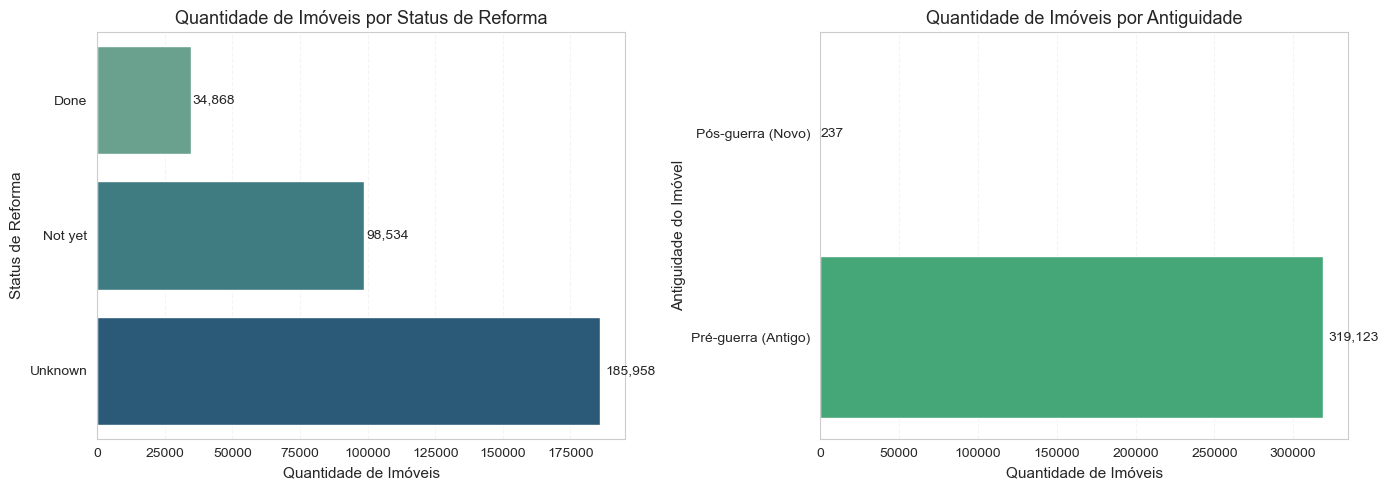

In [35]:
# Garante a exist√™ncia da coluna de r√≥tulo amig√°vel para o status pr√©/p√≥s-guerra
if 'PrewarBuilding' in df_eda.columns:
    df_eda['Prewar_Label'] = df_eda['PrewarBuilding'].map({
        0: "Pr√©-guerra (Antigo)",
        1: "P√≥s-guerra (Novo)"
    })
else:
    raise ValueError("Coluna 'PrewarBuilding' n√£o encontrada no DataFrame.")

# Contagem de im√≥veis por status de reforma
contagem_reno = (
    df_eda.groupby('Renovation')['TradePrice']
    .count()
    .sort_values(ascending=True)
)

# Contagem de im√≥veis por antiguidade (pr√©/p√≥s-guerra)
contagem_prewar = (
    df_eda.groupby('Prewar_Label')['TradePrice']
    .count()
    .sort_values(ascending=True)
)

# Cria subplots lado a lado para visualiza√ß√£o comparativa
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gr√°fico 1 ‚Äì Quantidade de im√≥veis por status de reforma
sns.barplot(
    x=contagem_reno.values,
    y=contagem_reno.index,
    palette='crest',
    ax=axes[0]
)
axes[0].set_title("Quantidade de Im√≥veis por Status de Reforma", fontsize=13)
axes[0].set_xlabel("Quantidade de Im√≥veis", fontsize=11)
axes[0].set_ylabel("Status de Reforma", fontsize=11)
axes[0].grid(axis='x', linestyle='--', alpha=0.2)

# Adiciona os valores num√©ricos ao lado das barras
for i, v in enumerate(contagem_reno.values):
    axes[0].text(v + 0.01 * v, i, f"{v:,}", va='center', fontsize=10)

# Gr√°fico 2 ‚Äì Quantidade de im√≥veis por antiguidade (pr√©/p√≥s-guerra)
sns.barplot(
    x=contagem_prewar.values,
    y=contagem_prewar.index,
    palette='viridis',
    ax=axes[1]
)
axes[1].set_title("Quantidade de Im√≥veis por Antiguidade", fontsize=13)
axes[1].set_xlabel("Quantidade de Im√≥veis", fontsize=11)
axes[1].set_ylabel("Antiguidade do Im√≥vel", fontsize=11)
axes[1].grid(axis='x', linestyle='--', alpha=0.2)

# Adiciona os valores num√©ricos ao lado das barras
for i, v in enumerate(contagem_prewar.values):
    axes[1].text(v + 0.01 * v, i, f"{v:,}", va='center', fontsize=10)

# Ajusta espa√ßamento e exibe o resultado
plt.tight_layout()
plt.show()

**An√°lise**

Nesse indicador ele apresentam a distribui√ß√£o dos im√≥veis segundo o status de reforma (Renovation) e a antiguidade da constru√ß√£o (PrewarBuilding). No gr√°fico √† esquerda, observa-se que a maioria dos registros est√° classificada como ‚ÄúUnknown‚Äù (‚âà185 mil im√≥veis), o que indica aus√™ncia de informa√ß√£o consistente sobre reformas. Entre os im√≥veis com status conhecido, aproximadamente 98 mil ainda n√£o passaram por reforma, enquanto apenas 34 mil foram reformados. Isso evidencia que reformas completas s√£o relativamente raras dentro do conjunto analisado. No gr√°fico √† direita, a vari√°vel de antiguidade mostra predomin√¢ncia quase total de im√≥veis constru√≠dos ap√≥s a Segunda Guerra Mundial (‚âà319 mil unidades), enquanto apenas 237 s√£o classificados como anteriores a 1945. Essa distribui√ß√£o confirma que o mercado imobili√°rio √© composto majoritariamente por constru√ß√µes modernas ou contempor√¢neas. Para o modelo preditivo, o status de reforma pode atuar como um indicador de conserva√ß√£o, embora exija tratamento para os valores ausentes. J√° a vari√°vel antiguidade apresenta baixa variabilidade, podendo ter impacto limitado na explica√ß√£o do pre√ßo, mas pode ser mantida como feature categ√≥rica complementar.

### 9) Qual o impacto do **zoneamento urbano** (`CityPlanning`, `Classification`, `CoverageRatio`, `FloorAreaRatio`) sobre o valor dos im√≥veis?

* **Insight:** Suporte a decis√µes de investimento e desenvolvimento urbano.

C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\2150707781.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


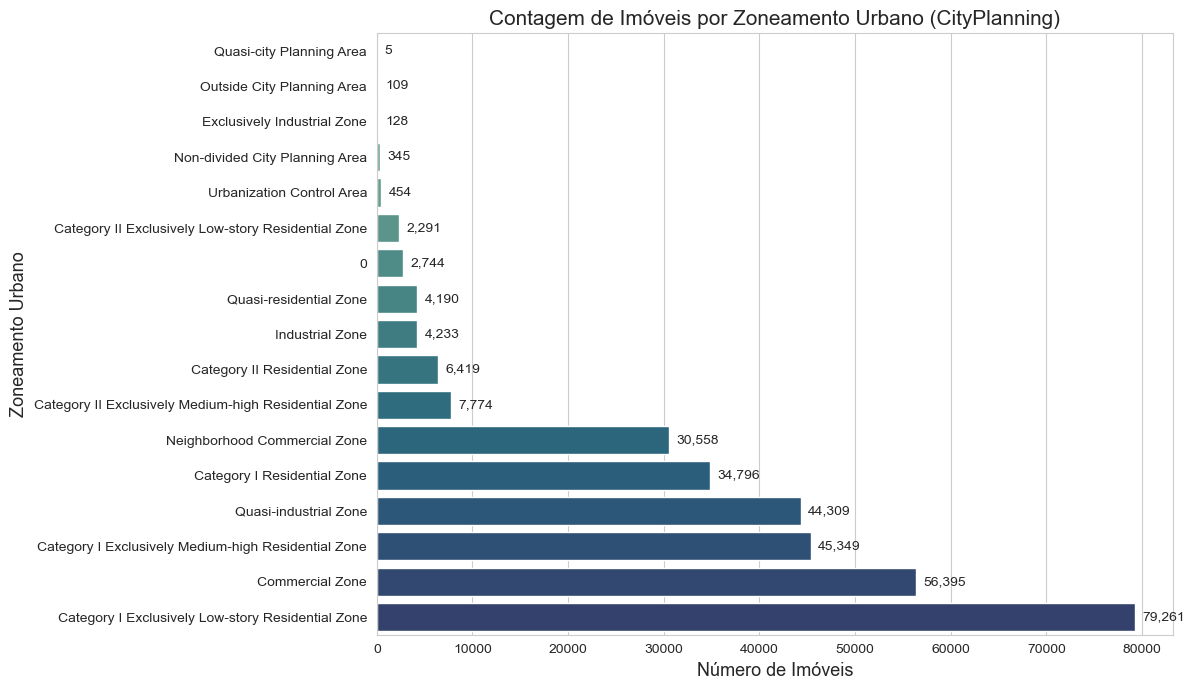

C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\2150707781.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


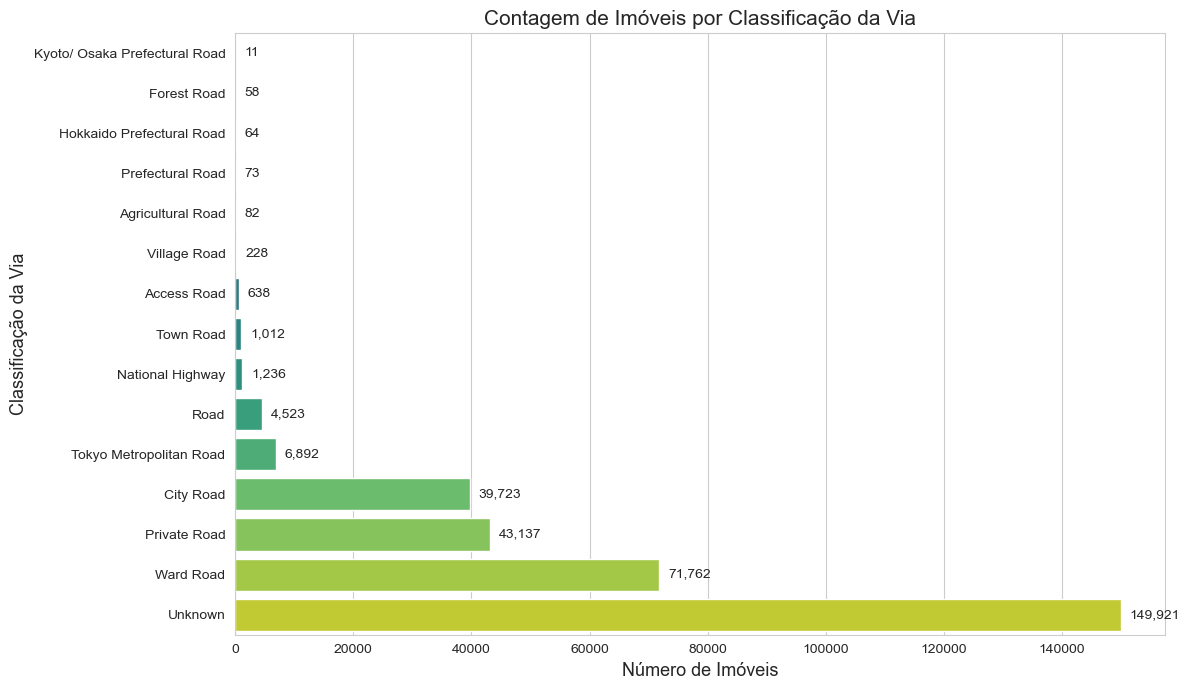

Correla√ß√£o entre indicadores de zoneamento urbano e pre√ßo de venda:
CoverageRatio     0.058587
FloorAreaRatio    0.080060
TradePrice        1.000000
Name: TradePrice, dtype: float64


In [36]:
# Conta o n√∫mero de im√≥veis em cada categoria de zoneamento
cityplan_counts = df_eda['CityPlanning'].value_counts().sort_values(ascending=True)

# Cria o gr√°fico de barras horizontal
plt.figure(figsize=(12, 7))
sns.barplot(
    x=cityplan_counts.values,
    y=cityplan_counts.index,
    palette='crest'
)
plt.title("Contagem de Im√≥veis por Zoneamento Urbano (CityPlanning)", fontsize=15)
plt.xlabel("N√∫mero de Im√≥veis", fontsize=13)
plt.ylabel("Zoneamento Urbano", fontsize=13)

# Adiciona os valores absolutos ao lado de cada barra
for i, v in enumerate(cityplan_counts.values):
    plt.text(v + cityplan_counts.max() * 0.01, i, f"{v:,}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Contagem de im√≥veis por classifica√ß√£o da via (Classification)
# Conta o n√∫mero de im√≥veis por classifica√ß√£o de via
classification_counts = df_eda['Classification'].value_counts().sort_values(ascending=True)

# Cria o gr√°fico de barras horizontal
plt.figure(figsize=(12, 7))
sns.barplot(
    x=classification_counts.values,
    y=classification_counts.index,
    palette='viridis'
)
plt.title("Contagem de Im√≥veis por Classifica√ß√£o da Via", fontsize=15)
plt.xlabel("N√∫mero de Im√≥veis", fontsize=13)
plt.ylabel("Classifica√ß√£o da Via", fontsize=13)

# Adiciona os valores absolutos ao lado de cada barra
for i, v in enumerate(classification_counts.values):
    plt.text(v + classification_counts.max() * 0.01, i, f"{v:,}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Correla√ß√£o entre indicadores urbanos e pre√ßo de venda

# Define as colunas de interesse
cols = ['CoverageRatio', 'FloorAreaRatio', 'TradePrice']

# Calcula a matriz de correla√ß√£o
corr_zoneamento = df_eda[cols].corr()

# Exibe a correla√ß√£o das vari√°veis urban√≠sticas com o pre√ßo de venda
print("Correla√ß√£o entre indicadores de zoneamento urbano e pre√ßo de venda:")
print(corr_zoneamento['TradePrice'])

**An√°lise**

Nesse indicador ele apresenta a distribui√ß√£o dos im√≥veis segundo o tipo de zoneamento urbano (CityPlanning). Observa-se que a maioria est√° concentrada em √°reas residenciais de baixa densidade, especialmente na categoria ‚ÄúCategory I Exclusively Low-story Residential Zone‚Äù, com aproximadamente 79 mil im√≥veis, seguida de ‚ÄúCommercial Zone‚Äù (‚âà56 mil) e ‚ÄúCategory I Exclusively Medium-high Residential Zone‚Äù (‚âà45 mil). As zonas comerciais e residenciais mistas representam uma parte expressiva da amostra, indicando que o mercado √© majoritariamente voltado a uso residencial urbano consolidado, com forte presen√ßa de com√©rcio local. Por outro lado, √°reas industriais ou de controle de urbaniza√ß√£o apresentam baixa representatividade, o que sugere menor volume de transa√ß√µes nessas regi√µes. Para fins de modelagem, a vari√°vel CityPlanning deve ser tratada como categ√≥rica nominal, podendo ser codificada por one-hot encoding ou target encoding. Al√©m disso, a predomin√¢ncia de determinadas categorias recomenda o uso de balanceamento ou regulariza√ß√£o, para evitar que zonas majorit√°rias dominem a predi√ß√£o do modelo.

J√° no segundo gr√°fico mostra a quantidade de im√≥veis distribu√≠dos por tipo de via p√∫blica associada ao endere√ßo (Classification). Nota-se uma concentra√ß√£o significativa em tr√™s categorias principais:

**‚ÄúUnknown‚Äù: cerca de 149 mil registros, indicando aus√™ncia de informa√ß√£o sobre a via**

**‚ÄúWard Road‚Äù: aproximadamente 71 mil im√≥veis;**

**‚ÄúPrivate Road‚Äù e ‚ÄúCity Road‚Äù: em torno de 43 mil e 39 mil im√≥veis, respectivamente.**

As demais classifica√ß√µes como National Highway, Access Road e Prefectural Road representam baixa participa√ß√£o no conjunto, com poucos milhares ou at√© centenas de registros. A alta incid√™ncia de valores ‚ÄúUnknown‚Äù sugere inconsist√™ncia ou falta de padroniza√ß√£o nos dados cadastrais, exigindo aten√ß√£o no pr√©-processamento (ex.: imputa√ß√£o, exclus√£o ou categoria separada). Para o modelo preditivo, essa vari√°vel deve ser tratada como categ√≥rica nominal, podendo ser codificada via one-hot encoding ou target encoding. As categorias raras podem ser agrupadas sob uma classe gen√©rica, reduzindo dispers√£o e sobreajuste.

C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\7881938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['CityPlanning'] = df_eda['CityPlanning'].replace('0', np.nan)


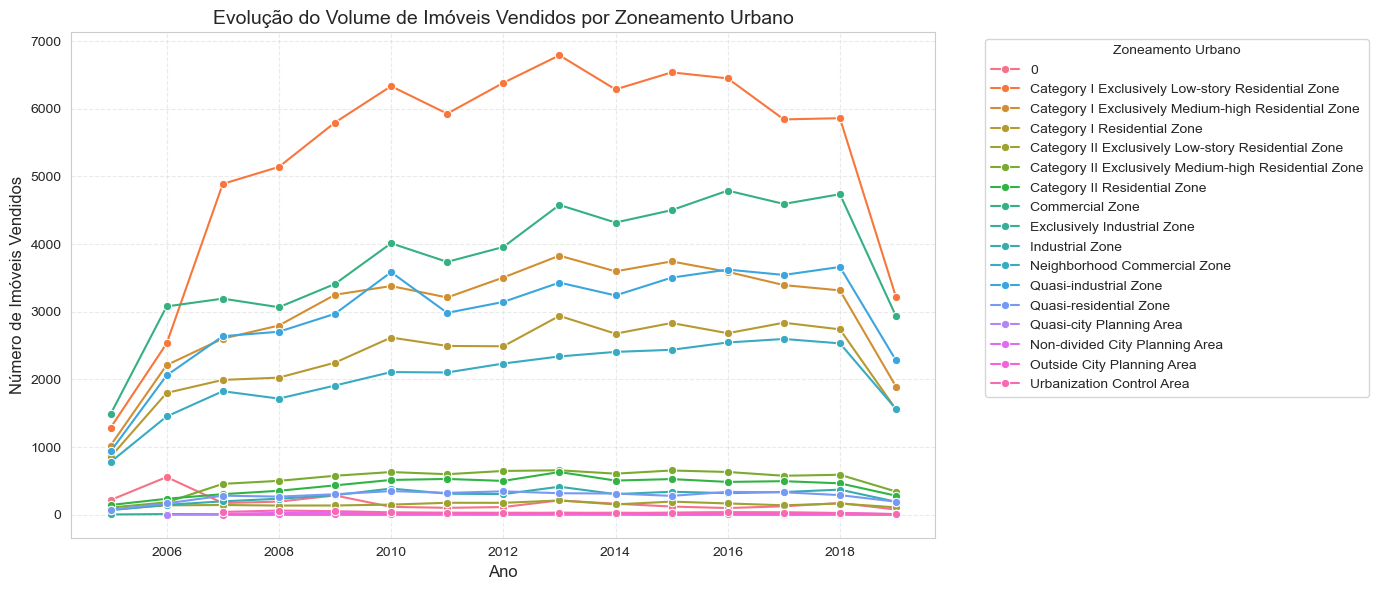

In [37]:
# Corre√ß√£o de valores imputados incorretamente
df_eda['CityPlanning'] = df_eda['CityPlanning'].replace('0', np.nan)

# Remove registros com zoneamento urbano ausente
df_eda_filtrado = df_eda[df_eda['CityPlanning'].notna()]

# Agrupamento de im√≥veis por ano e zoneamento urbano
zoneamento_ano = (
    df_eda_filtrado
    .groupby(['Year', 'CityPlanning'])
    .size()
    .reset_index(name='count')
)

# Gr√°fico: evolu√ß√£o do volume de im√≥veis vendidos por zoneamento urbano
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=zoneamento_ano,
    x='Year',
    y='count',
    hue='CityPlanning',
    marker='o'
)

plt.title("Evolu√ß√£o do Volume de Im√≥veis Vendidos por Zoneamento Urbano", fontsize=14)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("N√∫mero de Im√≥veis Vendidos", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Zoneamento Urbano')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

**An√°lise**

**Objetivo**

Avaliar como o volume de transa√ß√µes imobili√°rias em T√≥quio evoluiu entre 2005 e 2019, considerando o tipo de zoneamento urbano (*City Planning*). O objetivo √© identificar quais √°reas apresentam maior din√¢mica de mercado e se h√° padr√µes temporais relevantes.

**Principais Observa√ß√µes**

1. **Predomin√¢ncia de zonas residenciais de baixa densidade**
   As zonas Category I Exclusively Low-story Residential Zone concentram consistentemente o maior volume de vendas ao longo de todo o per√≠odo, ultrapassando 6.000 im√≥veis vendidos por ano nos picos de 2012‚Äì2014.
   Isso reflete o alto dinamismo de compra e venda em √°reas predominantemente residenciais e de baixa altura, t√≠picas de bairros familiares de T√≥quio.

2. **Zonas residenciais de m√©dia e alta densidade (Category I e II)**
   Apresentam volumes m√©dios (entre 2.000 e 4.000 im√≥veis/ano), por√©m com tend√™ncia est√°vel ou levemente crescente at√© 2016, antes de uma queda discreta nos anos finais.
   Essa estabilidade indica mercado maduro, com oferta e demanda equilibradas.

3. **Zonas comerciais e industriais**

   * Commercial Zone e Neighborhood Commercial Zone apresentam comportamento intermedi√°rio, com volumes regulares (entre 2.000 e 3.000 unidades anuais).
   * Industrial Zone e Exclusively Industrial Zone registram baixo volume de transa√ß√µes, o que √© esperado devido √† menor frequ√™ncia de compra e venda em propriedades industriais.

4. **√Åreas de planejamento especial e controle de urbaniza√ß√£o**
   Categorias como Urbanization Control Area e Outside City Planning Area exibem volumes quase residuais (inferiores a 500 im√≥veis/ano), indicando restri√ß√µes urban√≠sticas severas e baixo dinamismo imobili√°rio nessas regi√µes.

5. **Pico e desacelera√ß√£o (2010‚Äì2013 ‚Üí 2018‚Äì2019)**
   A maior parte das categorias apresenta pico de vendas entre 2010 e 2013, seguido de leve desacelera√ß√£o a partir de 2016.
   Essa tend√™ncia possivelmente reflete:

   * Esfor√ßos de reurbaniza√ß√£o p√≥s-crise global de 2008 e reconstru√ß√µes ap√≥s o terremoto de 2011;
   * Posterior estabiliza√ß√£o do mercado com redu√ß√£o de novas constru√ß√µes.

**Interpreta√ß√£o Geral**

* O gr√°fico revela uma forte centraliza√ß√£o das transa√ß√µes em zonas residenciais, sobretudo nas √°reas de baixa densidade, que sustentam a maior parte do mercado imobili√°rio de T√≥quio.
* O comportamento c√≠clico ‚Äî com crescimento at√© 2013 e leve retra√ß√£o posterior ‚Äî sugere matura√ß√£o do mercado urbano, com menor especula√ß√£o e maior estabilidade no estoque de im√≥veis.
* Zonas industriais e de controle urban√≠stico t√™m participa√ß√£o marginal, o que refor√ßa o car√°ter altamente residencial e regulado do territ√≥rio metropolitano.

**Conclus√£o**

O zoneamento urbano √© um fator determinante para o volume de vendas imobili√°rias.
As zonas residenciais de baixa densidade representam o n√∫cleo mais ativo do mercado, enquanto √°reas comerciais e industriais exercem papel complementar.
Essas informa√ß√µes s√£o cruciais para modelos de previs√£o de pre√ßo e demanda, permitindo ponderar a vari√°vel CityPlanning como um atributo relevante e n√£o linear no comportamento do mercado.

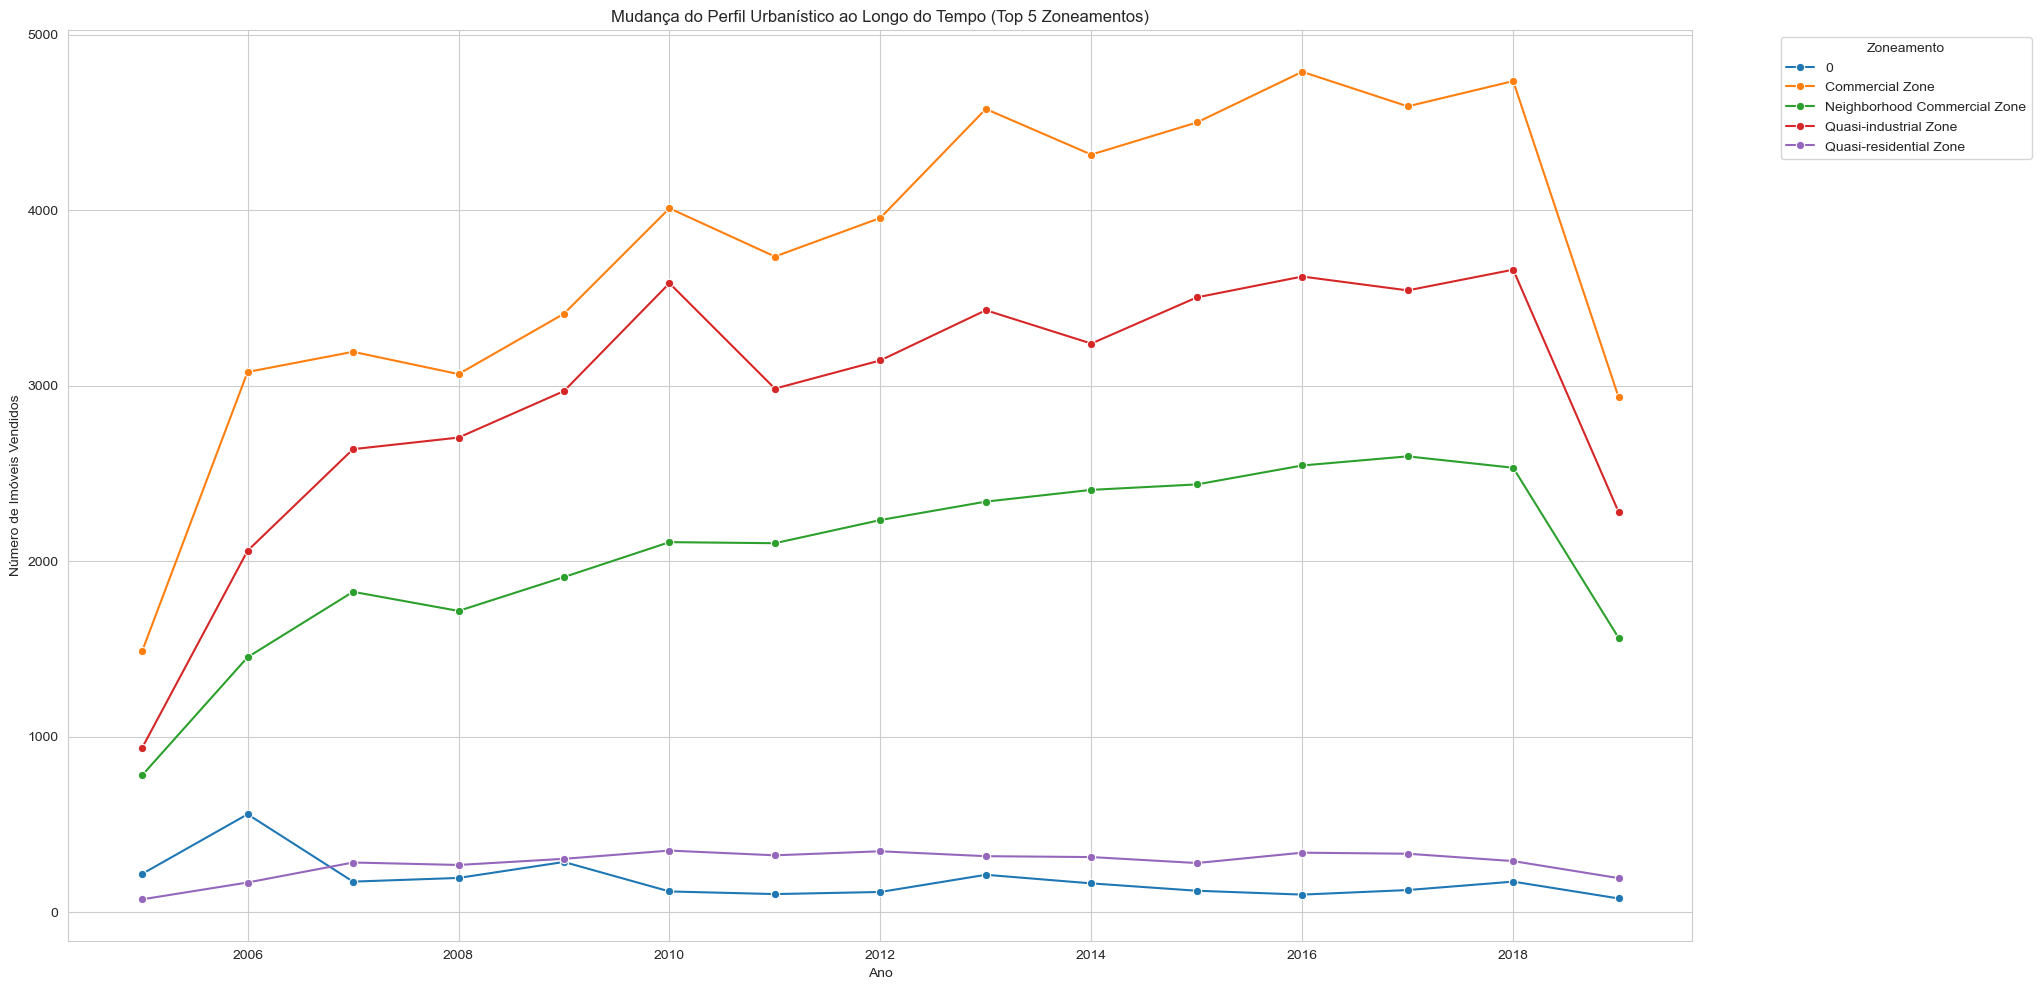

In [38]:
# Mudan√ßa do perfil urban√≠stico ao longo do tempo

# Conta im√≥veis vendidos por ano e tipo de zoneamento
perfil_urbano = df_eda.groupby(['Year', 'CityPlanning']).size().reset_index(name='count')

# Seleciona as 5 zonas mais comuns para evitar polui√ß√£o visual
top_zonas = perfil_urbano['CityPlanning'].value_counts().index[:5]
perfil_urbano = perfil_urbano[perfil_urbano['CityPlanning'].isin(top_zonas)]

# Gr√°fico de evolu√ß√£o temporal do perfil urban√≠stico
plt.figure(figsize=(20.5, 10))
sns.lineplot(
    x='Year',
    y='count',
    hue='CityPlanning',
    data=perfil_urbano,
    marker='o'
)

plt.title("Mudan√ßa do Perfil Urban√≠stico ao Longo do Tempo (Top 5 Zoneamentos)")
plt.xlabel("Ano")
plt.ylabel("N√∫mero de Im√≥veis Vendidos")
plt.legend(title="Zoneamento", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**An√°lise:**

O gr√°fico apresenta a evolu√ß√£o do n√∫mero de im√≥veis vendidos entre 2005 e 2019 nas cinco principais categorias de zoneamento urbano. Observa-se que a Commercial Zone possui o maior volume de vendas durante todo o per√≠odo, variando entre aproximadamente 3.000 e 4.800 im√≥veis por ano. Essa categoria mostra crescimento constante at√© 2016, com leve redu√ß√£o nos anos seguintes. A Neighborhood Commercial Zone apresenta comportamento semelhante, embora com valores ligeiramente menores. Ambas indicam forte concentra√ß√£o de transa√ß√µes em √°reas com uso predominantemente comercial. A Quasi-industrial Zone mant√©m trajet√≥ria de crescimento moderado e cont√≠nuo ao longo dos anos, saindo de valores pr√≥ximos a 1.000 im√≥veis para cerca de 2.500 ao final do per√≠odo. Isso sugere aumento gradual na utiliza√ß√£o dessas √°reas para fins mistos, acompanhando a readequa√ß√£o de espa√ßos urbanos. A Quasi-residential Zone e a categoria identificada como 0 (sem classifica√ß√£o) registram volumes muito inferiores, com pequenas varia√ß√µes anuais e comportamento est√°vel. O baixo n√∫mero de transa√ß√µes nessas zonas indica menor dinamismo imobili√°rio ou √°reas de ocupa√ß√£o consolidada com pouca oferta dispon√≠vel.De forma geral, o gr√°fico evidencia que o mercado imobili√°rio se concentra majoritariamente nas zonas comerciais e industriais leves, com tend√™ncia de estabilidade ap√≥s um per√≠odo de expans√£o at√© meados da d√©cada de 2010. Essa distribui√ß√£o reflete o processo de urbaniza√ß√£o densa e a prioriza√ß√£o de usos comerciais em regi√µes com maior infraestrutura urbana.

### 10) Quais s√£o os **outliers de pre√ßo e √°rea**?

Eles est√£o concentrados em bairros espec√≠ficos, tipos de im√≥vel ou per√≠odos do tempo?

* **Insight:** Identifica oportunidades, riscos ou anomalias de mercado.

In [39]:
from scipy.stats import zscore

# C√°lculo do Z-score para as vari√°veis de √°rea e pre√ßo
df_eda['z_area'] = zscore(df_eda['Area'])
df_eda['z_price'] = zscore(df_eda['TradePrice'])

# Cria√ß√£o da m√°scara de outliers (|z| > 3 em √°rea ou pre√ßo)
outlier_mask = (df_eda['z_area'].abs() > 3) | (df_eda['z_price'].abs() > 3)

# Separa√ß√£o dos conjuntos com e sem outliers
df_outliers = df_eda[outlier_mask]
df_nao_outliers = df_eda[~outlier_mask]

# Identifica√ß√£o dos bairros mais frequentes entre os outliers
top_bairros = (
    df_outliers['Municipality']
    .value_counts()
    .head(10)
)

# Identifica√ß√£o dos tipos de im√≥vel com mais outliers
top_types_outlier = (
    df_outliers['Type']
    .value_counts()
    .head(10)
)

# Estat√≠sticas gerais de outliers
print(f"Total de outliers encontrados: {df_outliers.shape[0]}")
print(f"Percentual de outliers: {100 * df_outliers.shape[0] / df_eda.shape[0]:.2f}%")

print("Top 10 bairros com mais outliers:")
print(top_bairros)

print("\nTop 10 tipos de im√≥vel entre os outliers:")
print(top_types_outlier)


Total de outliers encontrados: 11943
Percentual de outliers: 3.74%
Top 10 bairros com mais outliers:
Municipality
Minato Ward      744
Setagaya Ward    716
Shibuya Ward     603
Adachi Ward      535
Ota Ward         532
Hachioji City    507
Shinjuku Ward    441
Nerima Ward      426
Edogawa Ward     410
Machida City     393
Name: count, dtype: int64

Top 10 tipos de im√≥vel entre os outliers:
Type
Residential Land(Land and Building)    6346
Residential Land(Land Only)            5286
Pre-owned Condominiums, etc.            249
Forest Land                              50
Agricultural Land                        12
Name: count, dtype: int64


C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\1303094592.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['z_area'] = zscore(df_eda['Area'])
C:\Users\rafae.RAFAEL_NOTEBOOK\AppData\Local\Temp\ipykernel_25996\1303094592.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['z_price'] = zscore(df_eda['TradePrice'])


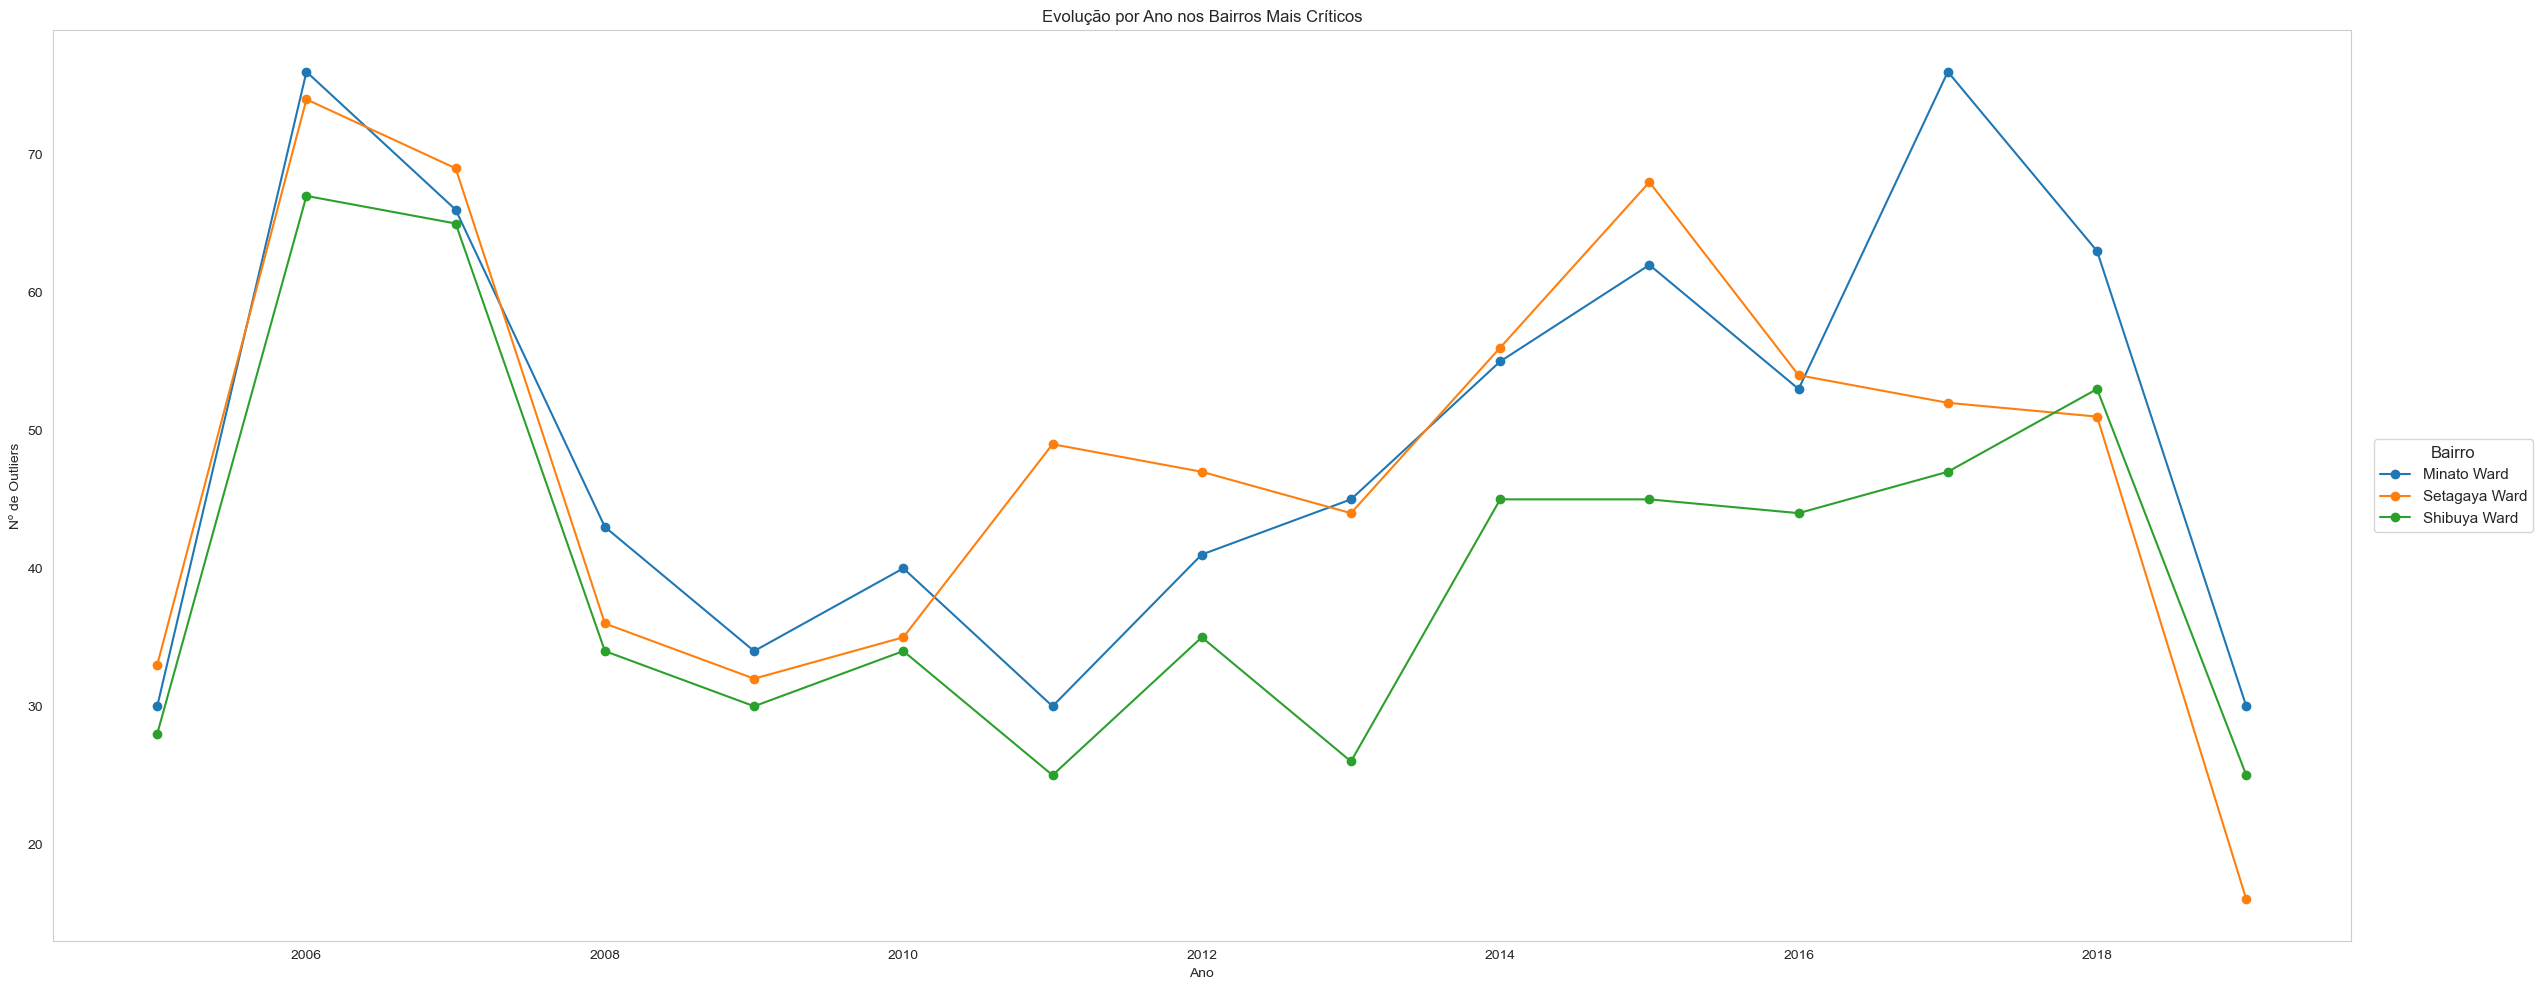

In [40]:
# Gr√°fico linha temporal para os 3 bairros com mais outliers:
top_bairros_index = top_bairros.index[:3]
df_top_bairros = df_outliers[df_outliers['Municipality'].isin(top_bairros_index)]
count_ano_bairro = df_top_bairros.groupby(['Year', 'Municipality']).size().unstack().fillna(0)

ax = count_ano_bairro.plot(figsize=(25.5, 10), marker='o')
plt.title('Evolu√ß√£o por Ano nos Bairros Mais Cr√≠ticos')
plt.ylabel('N¬∫ de Outliers')
plt.xlabel('Ano')

# Coloca a legenda fora do gr√°fico (√† direita)
plt.legend(
    title="Bairro",
    loc='center left',
    bbox_to_anchor=(1.01, 0.5),
    borderaxespad=0,
    fontsize=11,
    title_fontsize=12
)

plt.tight_layout()
plt.grid(False)
plt.show()


**An√°lise:**

Nesse gr√°fico explicar como a varia√ß√£o anual no n√∫mero de outliers identificados nos bairros Minato Ward**, Setagaya Ward e Shibuya Ward. Observa-se que os tr√™s bairros seguem padr√µes semelhantes, com picos expressivos de outliers em 2006, 2015, 2017. Esses aumentos podem estar relacionados a varia√ß√µes abruptas nos pre√ßos de venda dos im√≥veis, possivelmente influenciadas por fatores econ√¥micos, lan√ßamentos imobili√°rios de alto valor ou modifica√ß√µes na infraestrutura urbana. Entre 2008, 2013, nota-se um per√≠odo de maior estabilidade, com redu√ß√£o significativa no n√∫mero de valores at√≠picos. Esse intervalo pode representar uma fase de equil√≠brio do mercado imobili√°rio, com menor discrep√¢ncia nos pre√ßos dentro de cada bairro. Em termos comparativos, o Minato Ward apresenta os maiores valores absolutos de outliers, o que indica maior dispers√£o dos pre√ßos caracter√≠stica comum em regi√µes de alto padr√£o, onde im√≥veis muito valorizados coexistem com constru√ß√µes mais antigas. Setagaya Ward, Shibuya Ward exibem comportamentos pr√≥ximos, por√©m com varia√ß√µes menos intensas. No per√≠odo final da s√©rie (ap√≥s 2018), h√° uma queda acentuada no n√∫mero de outliers nos tr√™s bairros, sugerindo que o mercado se tornou mais homog√™neo ou que houve menor volume de transa√ß√µes extremas. De modo geral, o gr√°fico evidencia movimentos c√≠clicos de valoriza√ß√£o e corre√ß√£o** nos principais bairros de T√≥quio, refletindo as oscila√ß√µes naturais de um mercado urbano altamente din√¢mico e sens√≠vel a fatores econ√¥micos e estruturais.